# Mobile Phone Pricing Prediction

Objective: Build a system that can predict pricing for a mobile phone using data on available phones in the market. Predict if the mobile can be priced low/med/high/very high. Explore the data to understand the features and figure out an approach.

In [ ]:
#Importing basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Mobile Phone Pricing.csv to Mobile Phone Pricing.csv


In [ ]:
# Loading the data
df =pd.read_csv("Mobile Phone Pricing.csv")

In [ ]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [ ]:
df.shape
print(f'Total Rows = {df.shape[0]}\nTotal Columns={df.shape[1]} ')

Total Rows = 2000
Total Columns=21 


In [ ]:
df.shape[0]

2000

In [ ]:
df.shape[1]

21

In [ ]:
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

Some Basic Observations:

We can see that sc_width (screen widht) and px_height (pixel height) has minimum value 0. which is not possible in any mobile. We need to handle this error.

In [ ]:

# Checking How many observations having screen width value as 0.
print(df[df['sc_w']==0].shape[0])


180


In [ ]:

# Checking How many observations having px_hieght value as 0.
print(df[df['px_height']==0].shape[0])


2


In [ ]:
# As there are only 2 observations having px_height=0. so we will drop it.
df=df[df['px_height']!=0]


In [ ]:
df.shape[0]

1998

# Nearest Neighbors Imputations (KNNImputer)

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Let’s take the above example of the dataset to see how it works.

Before using KNN Imputer we need to replace 0 with NAN values. so that it will work.

In [ ]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)
df['sc_w']


0        7.0
1        3.0
2        2.0
3        8.0
4        2.0
        ... 
1995     4.0
1996    10.0
1997     1.0
1998    10.0
1999     4.0
Name: sc_w, Length: 1998, dtype: float64

In [ ]:
# import KNN imputer from sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)

In [ ]:
df.shape

(1998, 21)

In [ ]:
df.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1         1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2          563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3          615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4         1821.0   1.0          1.2       0.0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0       19.0      0.0           0.0   1.0          1.0  
1        7.0      1.0           1.0   0.0          2.0  
2        9.0      1.0           1.0   0.0          2.0  
3       11.0      1.0           0.0   0.0          2.0  
4       15.0      1.0           1.0   0.0          1.0  

[5 rows x 21 columns]

In [ ]:

# Checking How many observations having sc_w value as 0.
df[df['sc_w']==0].shape[0]

0

Thus we have handled the mismatched values of the data.

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.tail()

battery_power  blue  clock_speed  dual_sim   fc  four_g  int_memory  \
1993          794.0   1.0          0.5       1.0  0.0     1.0         2.0   
1994         1965.0   1.0          2.6       1.0  0.0     0.0        39.0   
1995         1911.0   0.0          0.9       1.0  1.0     1.0        36.0   
1996         1512.0   0.0          0.9       0.0  4.0     1.0        46.0   
1997          510.0   1.0          2.0       1.0  5.0     1.0        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
1993    0.8      106.0      6.0  ...     1222.0    1890.0   668.0  13.0   4.0   
1994    0.2      187.0      4.0  ...      915.0    1965.0  2032.0  11.0  10.0   
1995    0.7      108.0      8.0  ...      868.0    1632.0  3057.0   9.0   1.0   
1996    0.1      145.0      5.0  ...      336.0     670.0   869.0  18.0  10.0   
1997    0.9      168.0      6.0  ...      483.0     754.0  3919.0  19.0   4.0   

      talk_time  three_g  touch_screen  wifi  price_range  
1993       19.0      1.0           1.0   0.0          0.0  
1994       16.0      1.0           1.0   1.0          2.0  
1995        5.0      1.0           1.0   0.0          3.0  
1996       19.0      1.0           1.0   1.0          0.0  
1997        2.0      1.0           1.0   1.0          3.0  

[5 rows x 21 columns]

In [ ]:
# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

#set style
# plt.style.use('seaborn')
sns.set()


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

We don't have any object data type in our data set.

Also we have Zero null values in data set.

Price_range is our target variable.

In [ ]:
# Checking Null values.
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

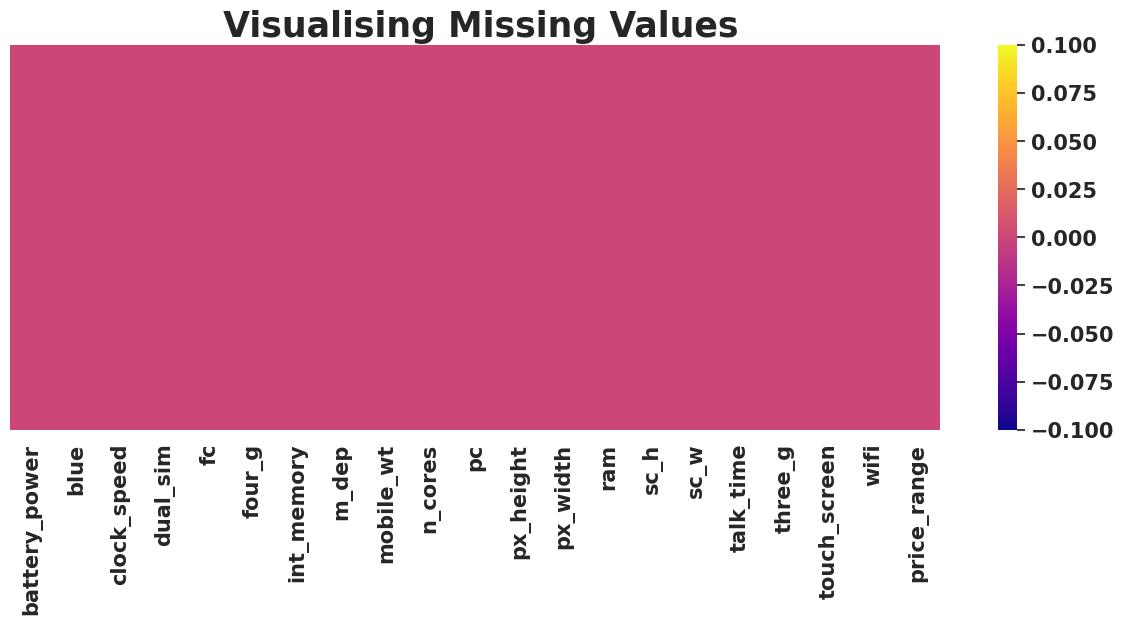

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

No Null values found.

In [ ]:
# Checking Duplicate values in data set.
print(f' We have {df.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.



# EDA( Exploratory Data Analysis)

Let's have look at target variable first.!

In [ ]:
# lets have look at our target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

price_range
2.0    500
0.0    500
1.0    499
3.0    499
Name: count, dtype: int64

We have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable.Accuracy score will be the best evalaution metric for us to select the model.

This is the target variable with value of

0=low cost,
1=medium cost,
2=high cost,
3=very high cost.

<Axes: ylabel='count'>

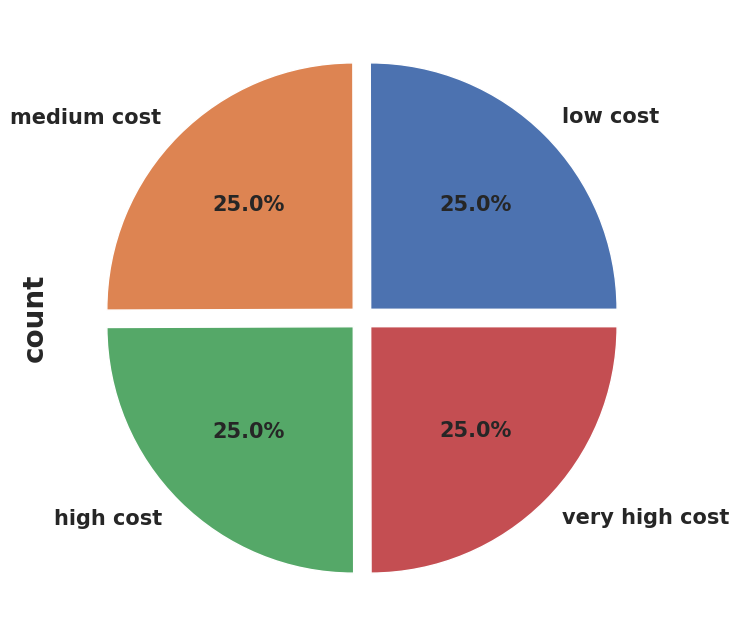

In [ ]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting pie chart



We can see that our target varibale is equally distributed.
Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.

<Axes: >

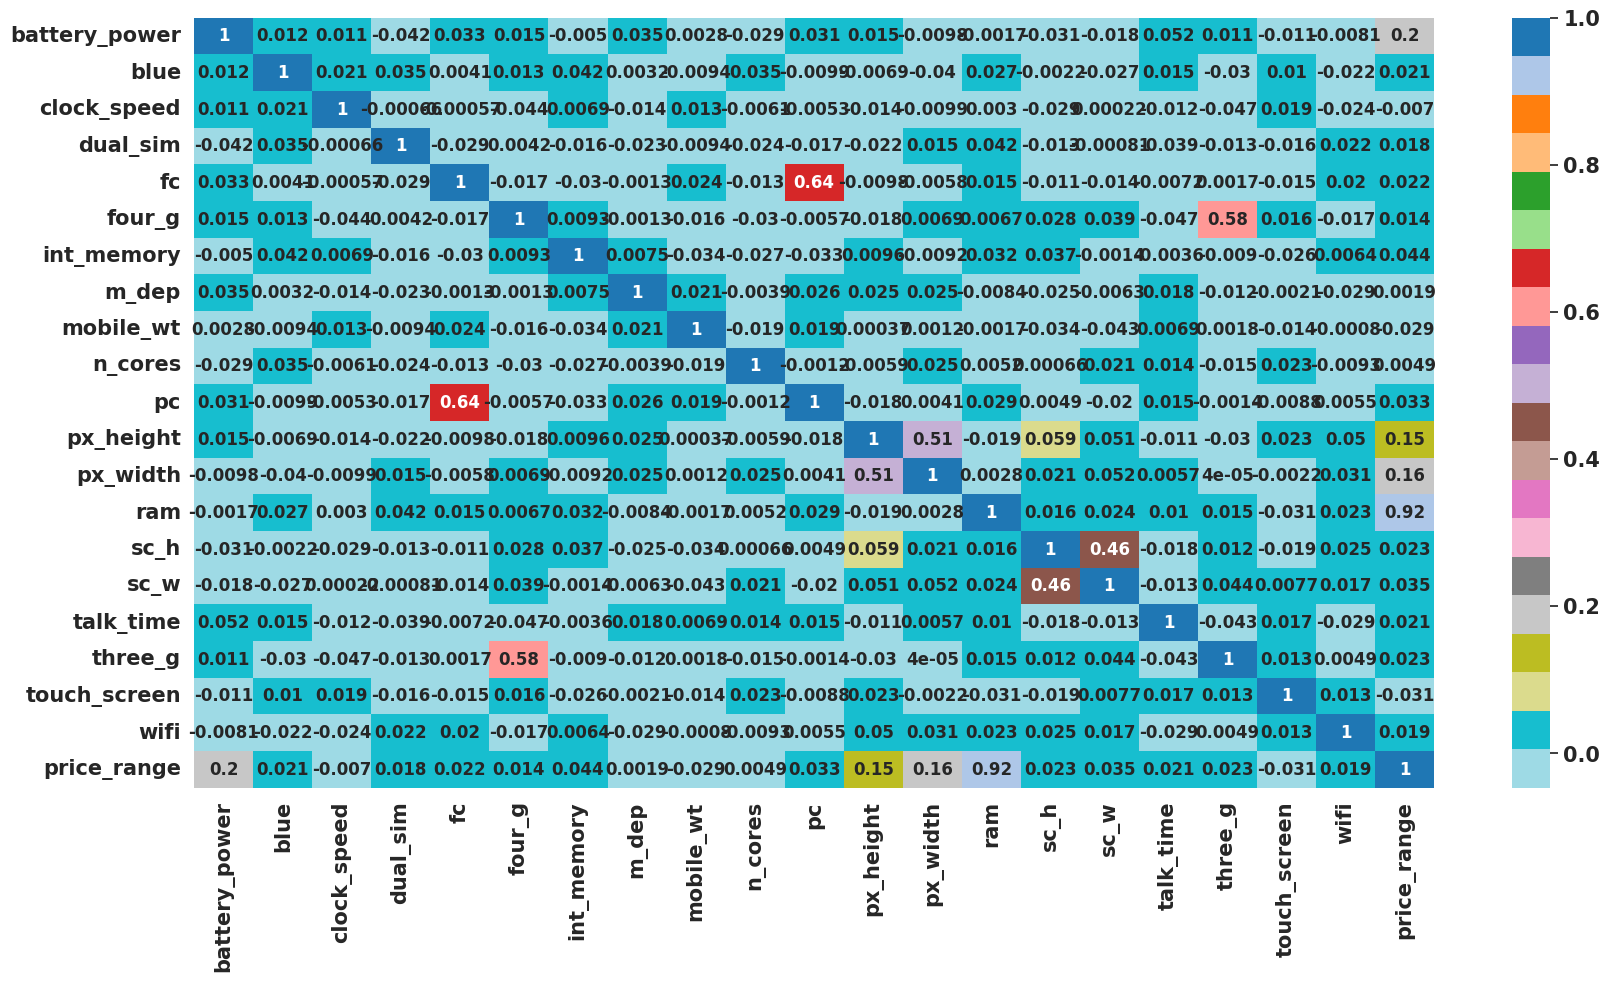

In [ ]:

corr= df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.tab20_r)

df.columns

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Univariate Analysis of Categorical columns.

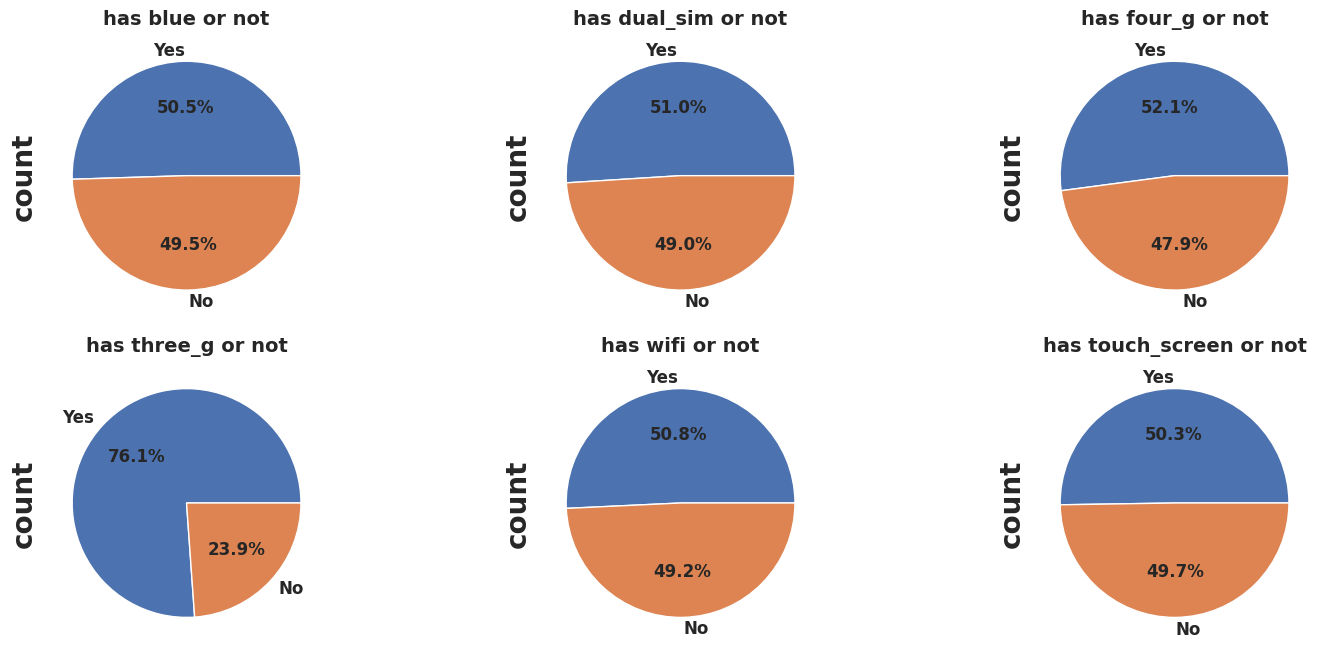

In [ ]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  df[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1




*  1 means it has the specifications.
*  0 means it do not have the specifications.
*  Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and
   touchscreen are almost 50 %.
*   very few mobiles(23.8%) do not have Three_g
.



# Relation Between RAM,Battery_power,px_height and px_width

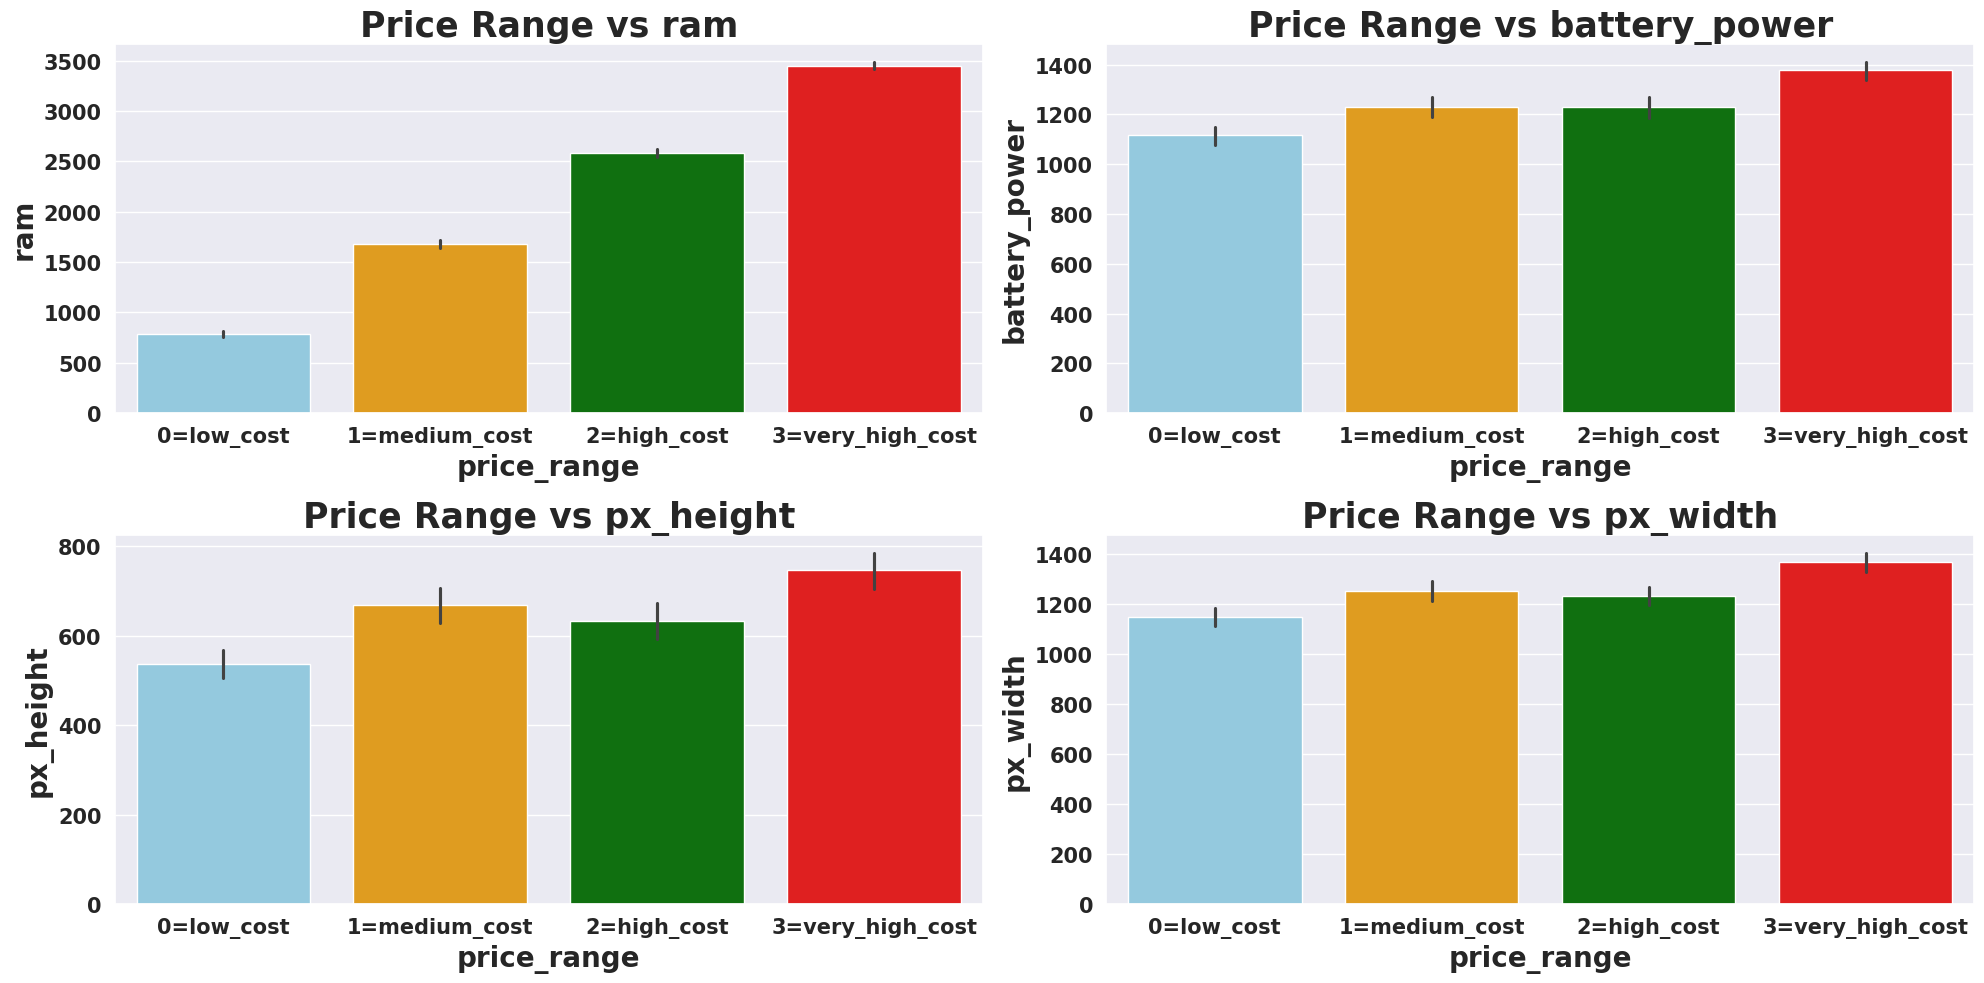

In [ ]:
# plotting  price_range vs other features


plt.figure(figsize=(20,10))

labels = ['0=low_cost', '1=medium_cost', '2=high_cost', '3=very_high_cost']
rows = 2
cols = 2
counter = 1

variables = ['ram', 'battery_power', 'px_height', 'px_width']


bar_colors = ['skyblue', 'orange', 'green', 'red']

for var in variables:
    plt.subplot(rows, cols, counter)

    sns.barplot(
        data=df,
        x='price_range',
        y=var,
        palette=bar_colors
    )

    plt.title(f'Price Range vs {var}')
    plt.xticks(ticks=[0, 1, 2, 3], labels=labels)
    counter += 1
    plt.tight_layout()

plt.show()


# Observations:
Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.

Mobiles having RAM less than 1000 MB falls under low cost category.

Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.

Mobiles with more than 700 pixel height and width more than 1300 has very high cost.

In [ ]:
# Checking the counts of binary categorical variables by grouping price range.
grup_by_price=df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()

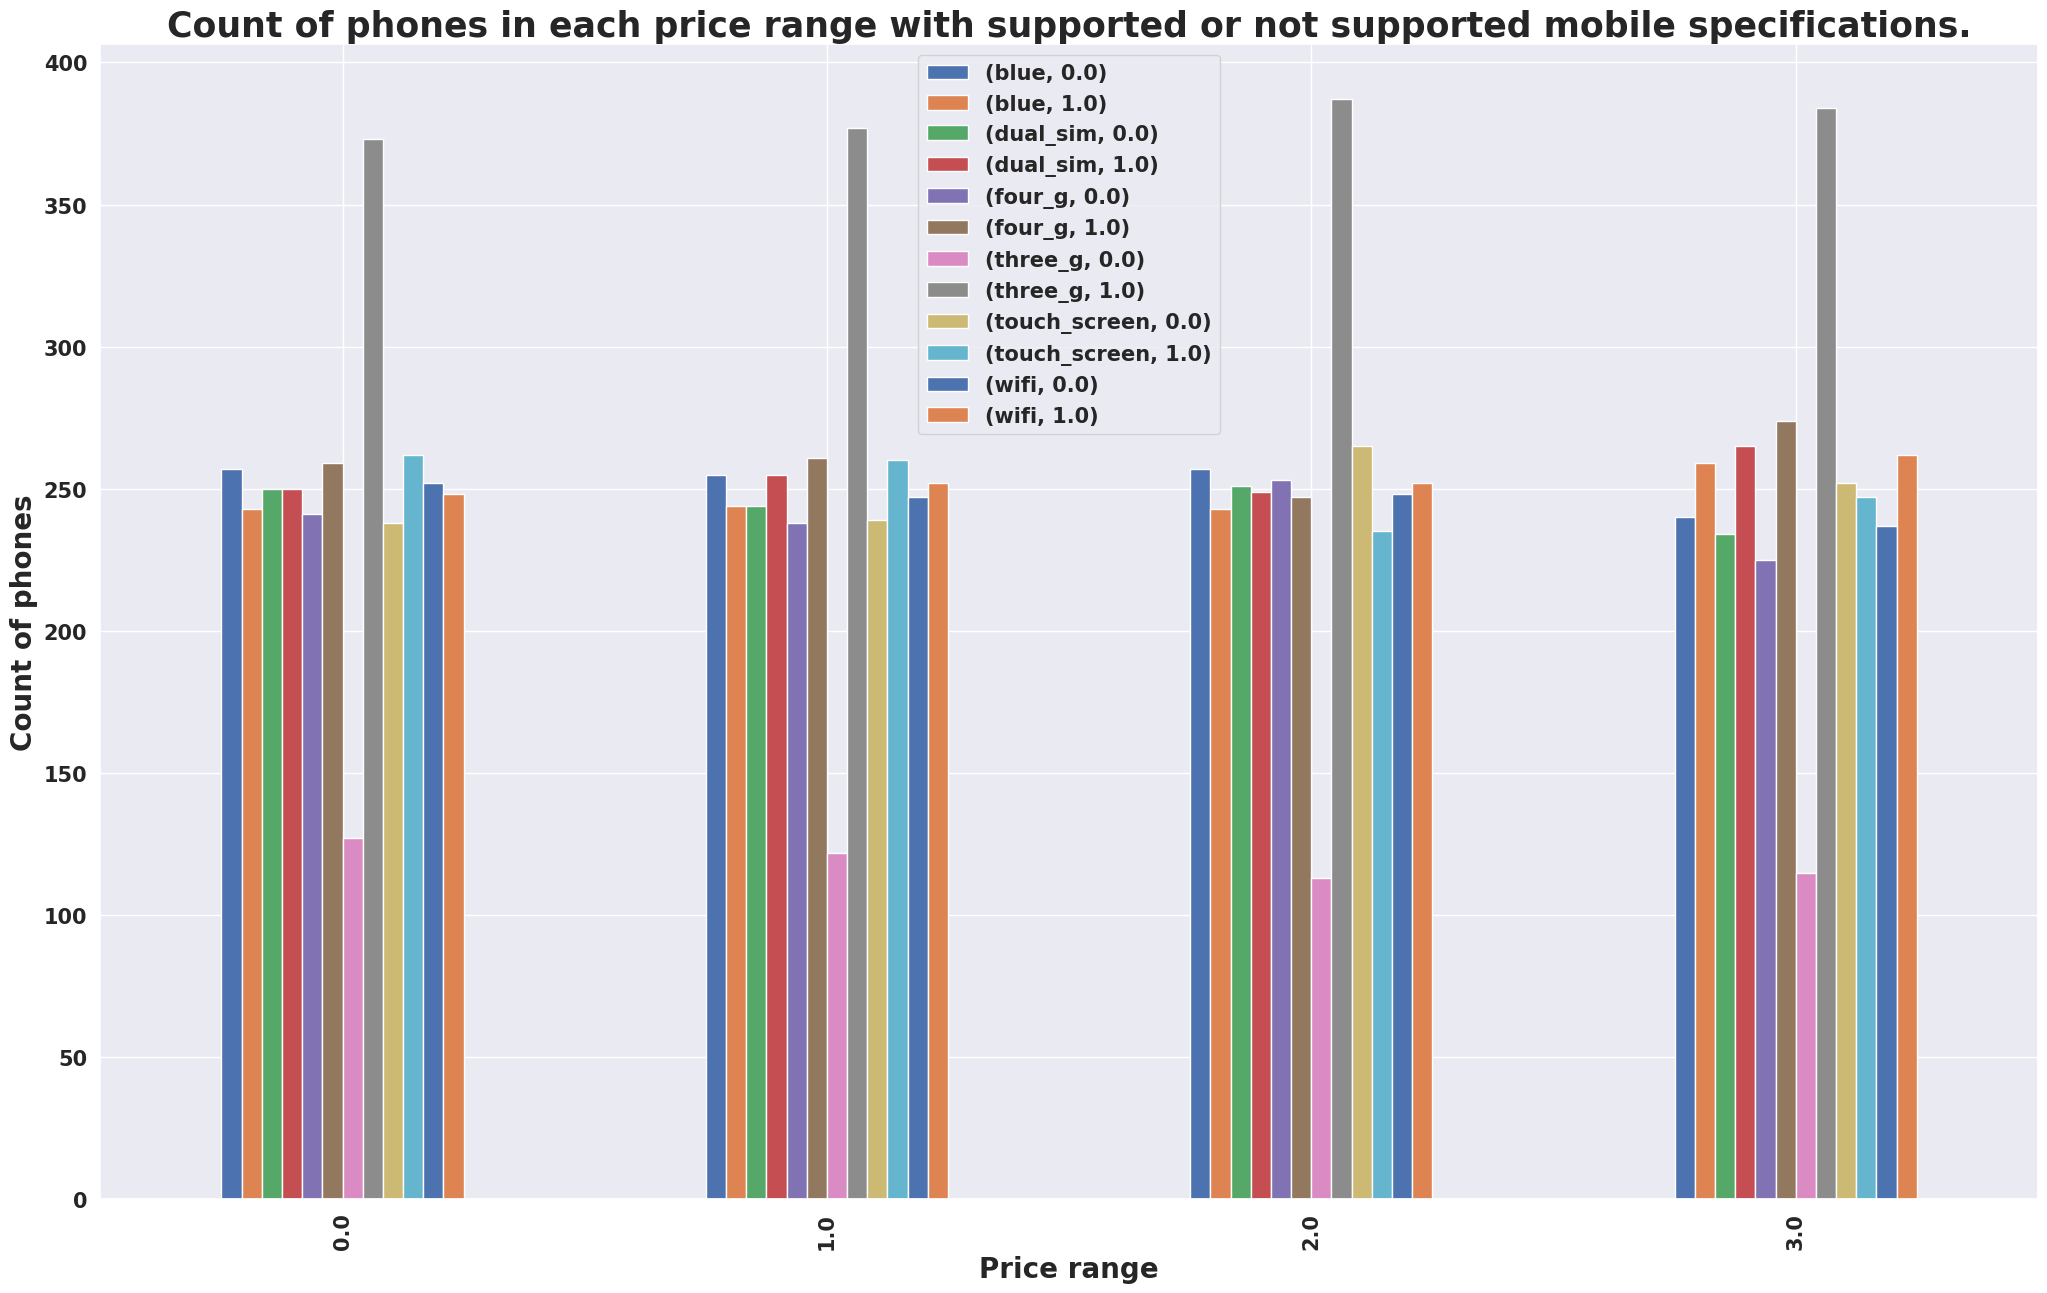

In [ ]:
# visualising by plotting barchat.
# plt.figure(figsize=(12,6))
grup_by_price.plot.bar(figsize=(25,15))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')
plt.legend(loc='upper center')

**Observations:**
We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.

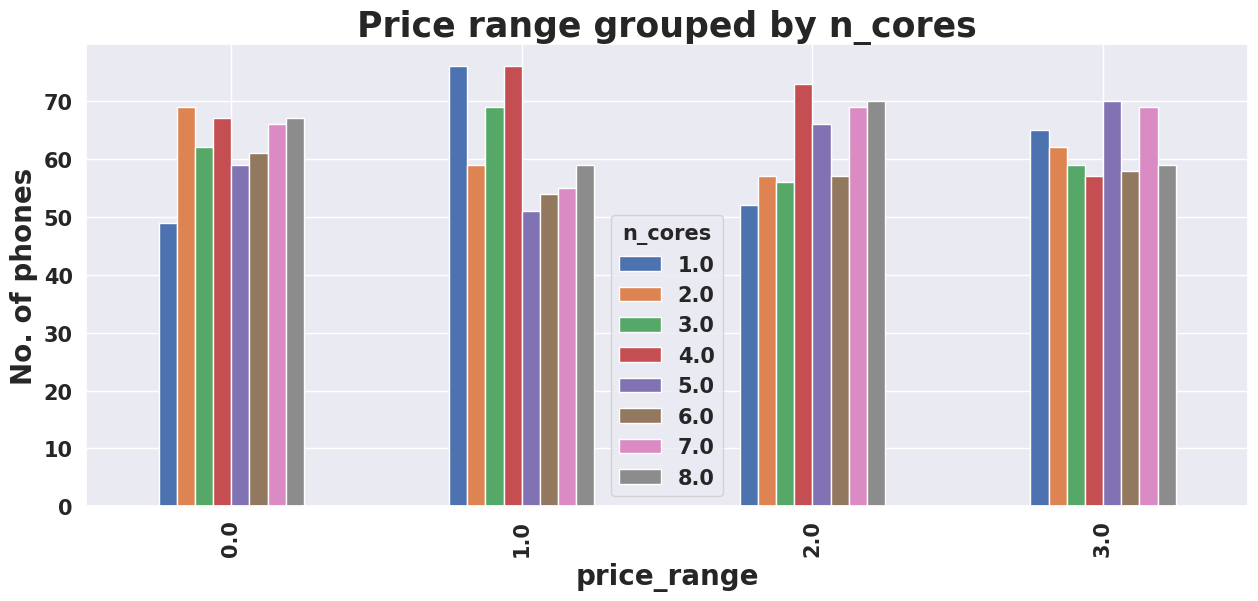

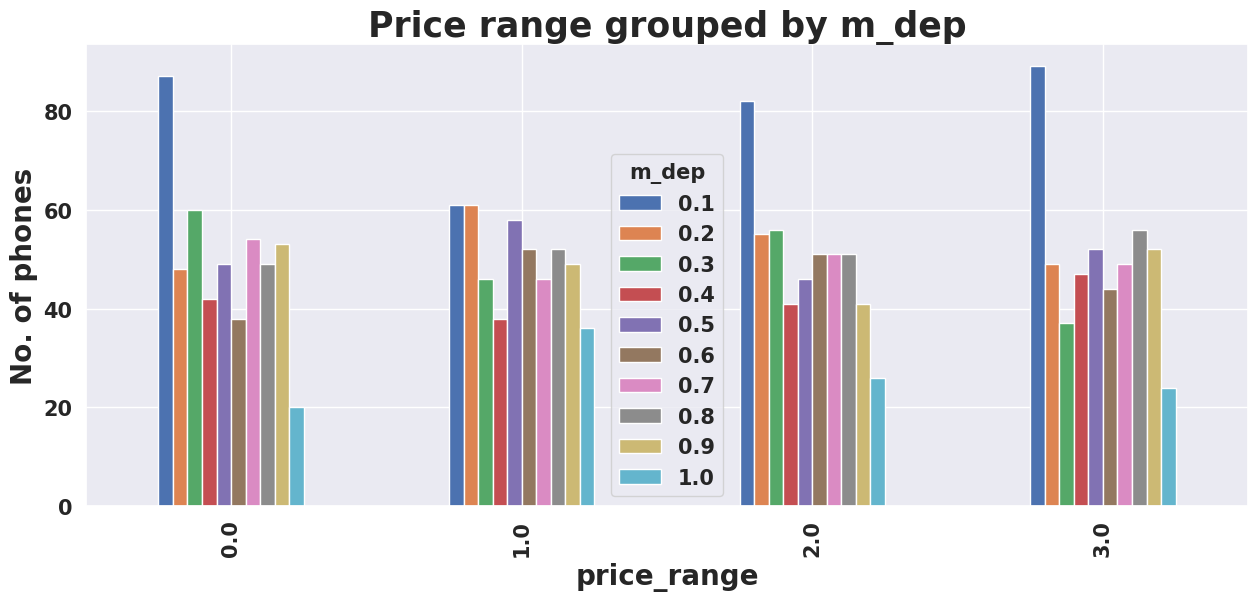

In [ ]:
list1=['n_cores','m_dep']
for item in list1:

  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,6))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

**Observations:**
There are very few mobiles in price range 0 and 1 with lesser no of cores.

Most of the mobiles in price range 2 and 3 are with high no of cores.

Number of phones with less thickness is high and count of phones with high thickness is low.

Let's Check which numerical feature is driving the price range most.

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

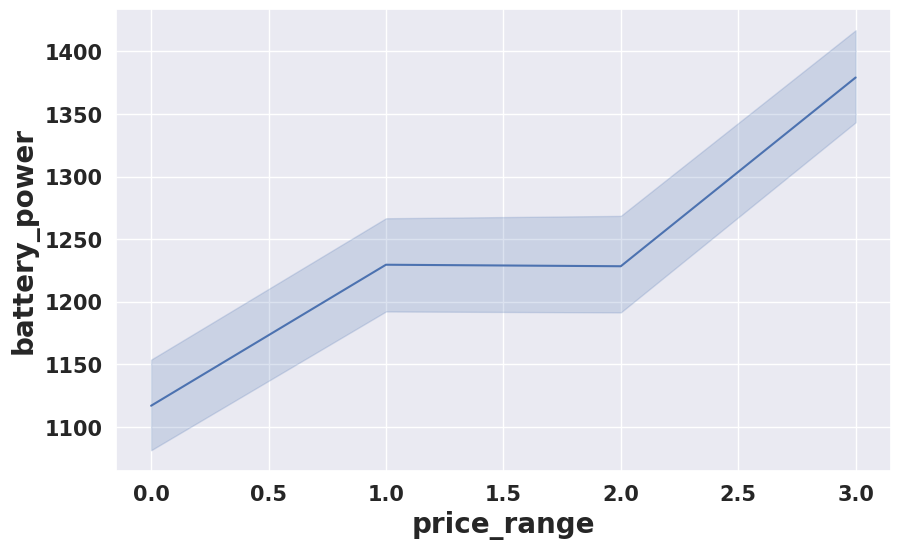

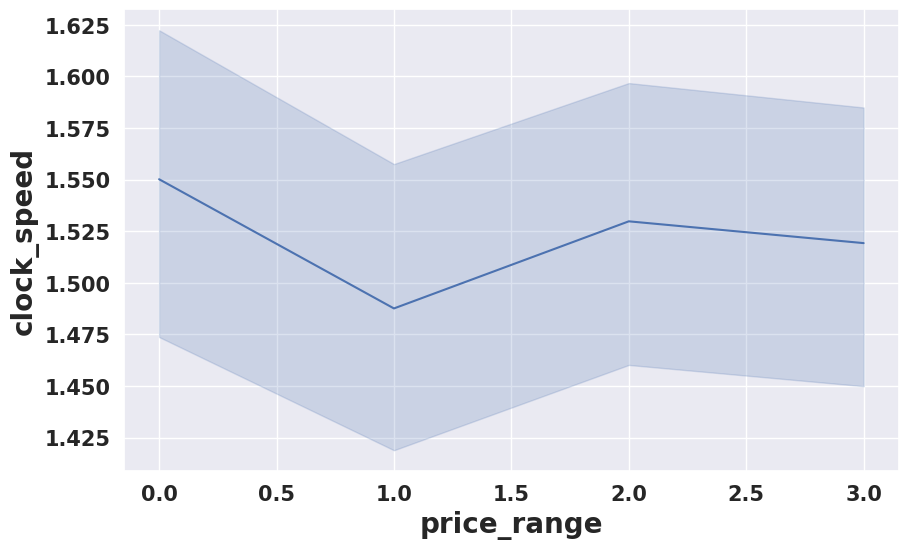

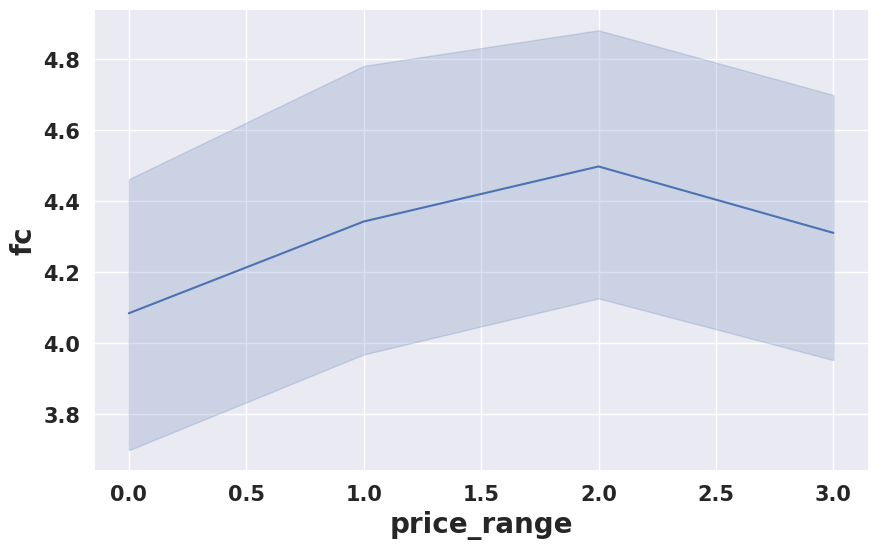

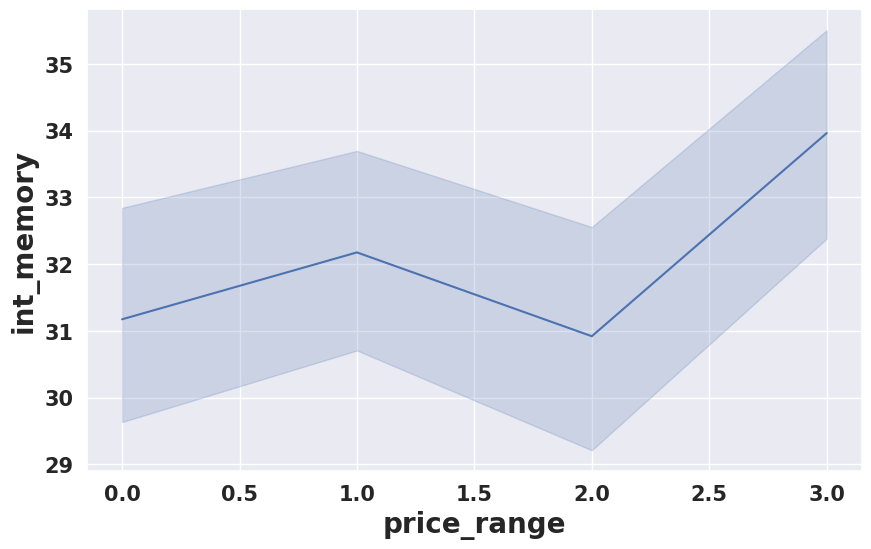

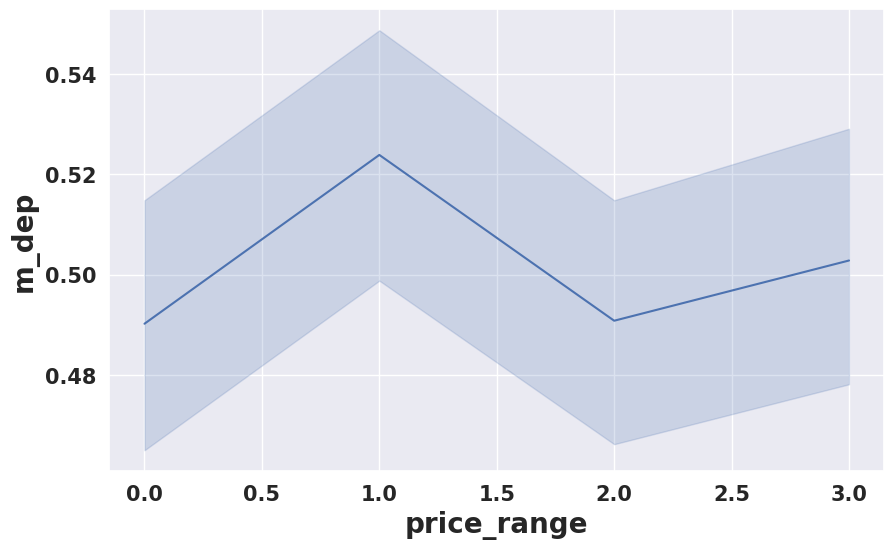

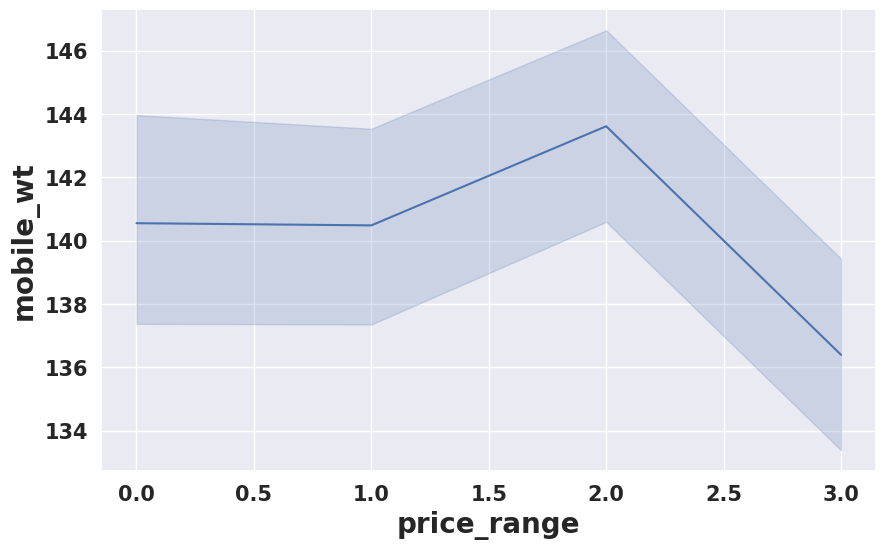

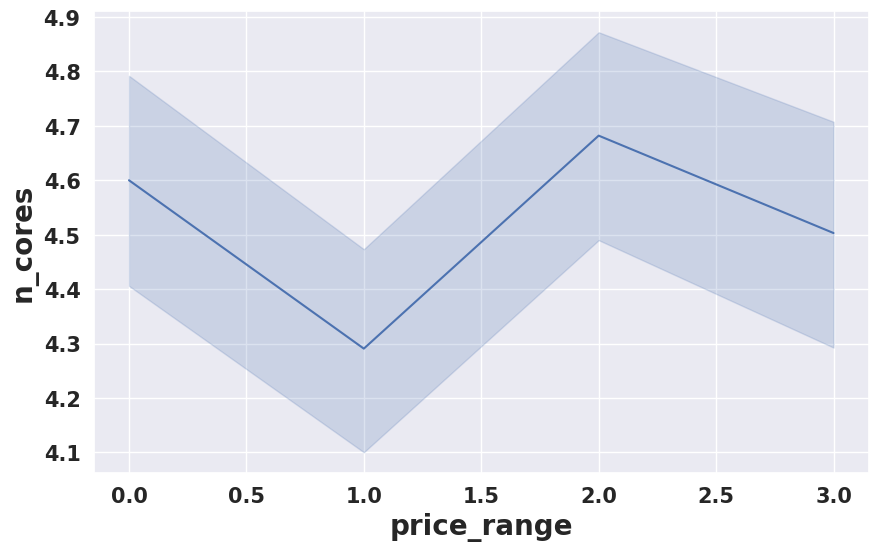

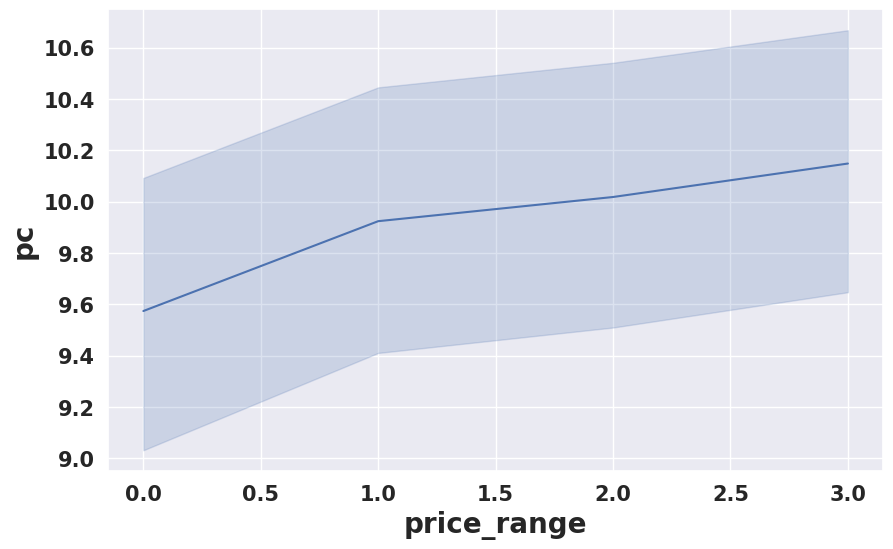

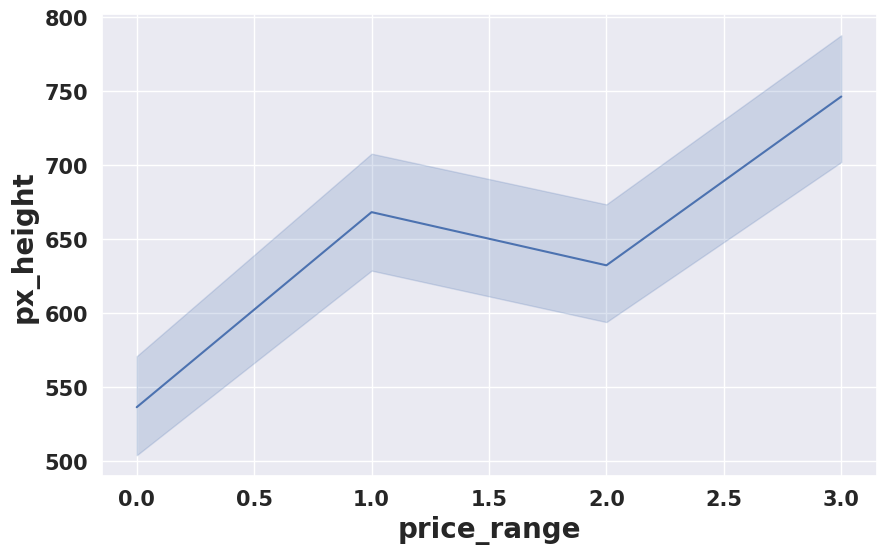

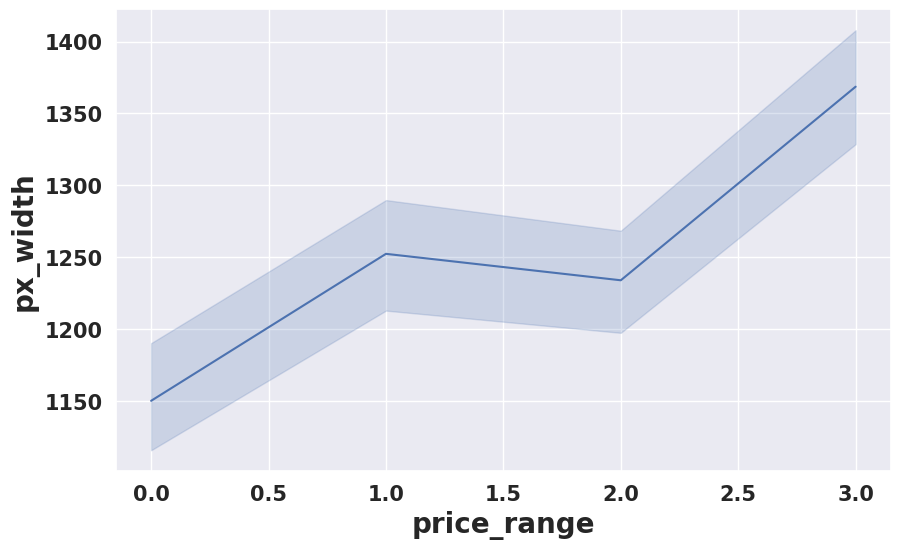

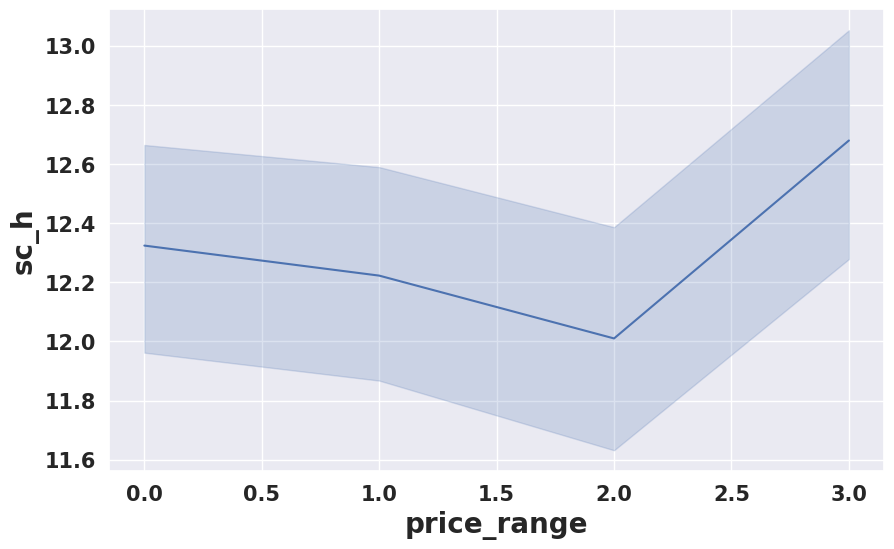

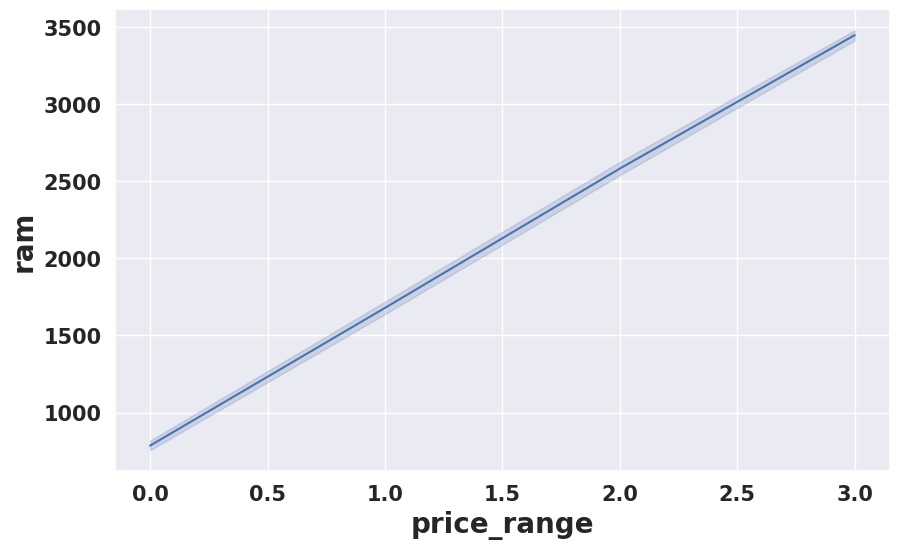

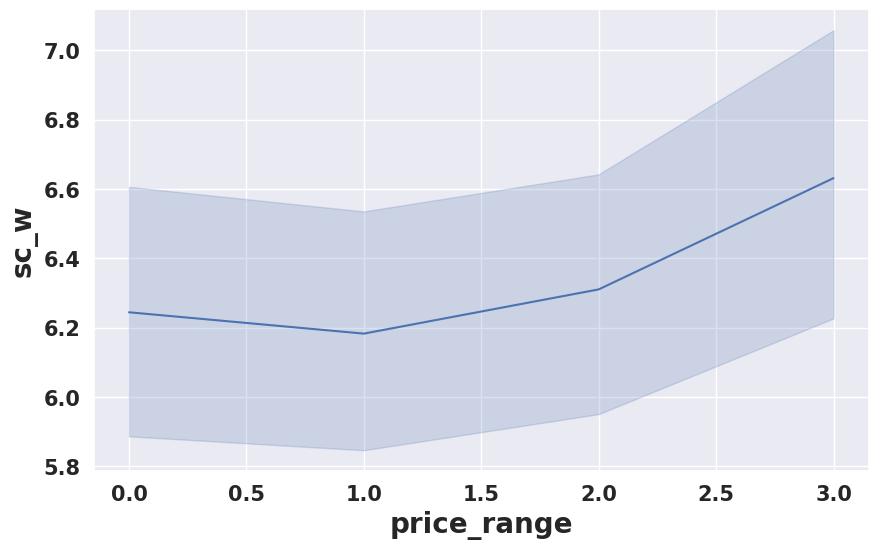

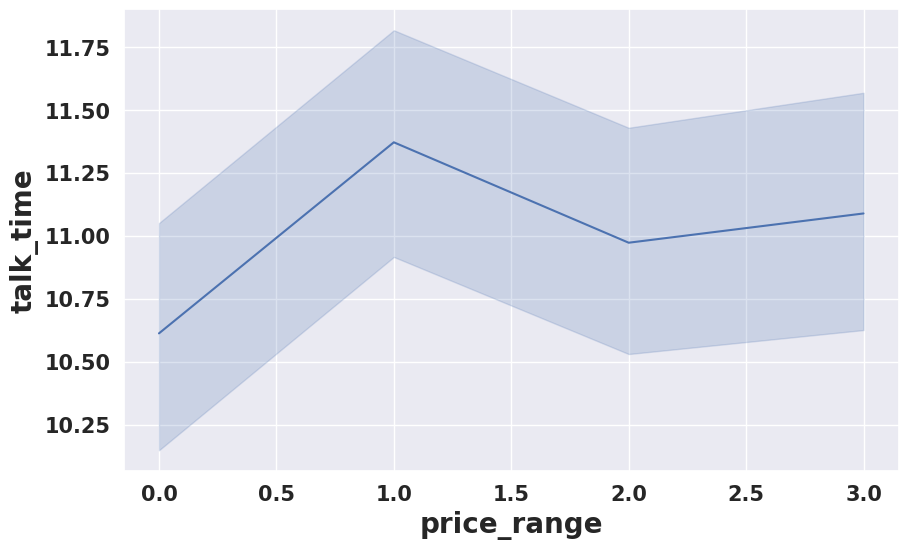

In [ ]:
# plotting boXplot and distribution
list2=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']

counter=1
for var in list2:
    plt.figure(figsize=(10,6))

    sns.lineplot(x=df['price_range'],y=df[var])

**Observations:**
For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.
Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.
Mobiles having max screen height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. As resolution of screen increases the price also increases RAM has clear relationship with price range we saw that in correlation matrix also.

# **Mobiles with both 3G and 4G**

In [ ]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=df[(df['three_g']==1) & (df['four_g']==1)]

In [ ]:
three_g_and_4g_df['price_range'].value_counts()

price_range
3.0    274
1.0    261
0.0    259
2.0    247
Name: count, dtype: int64

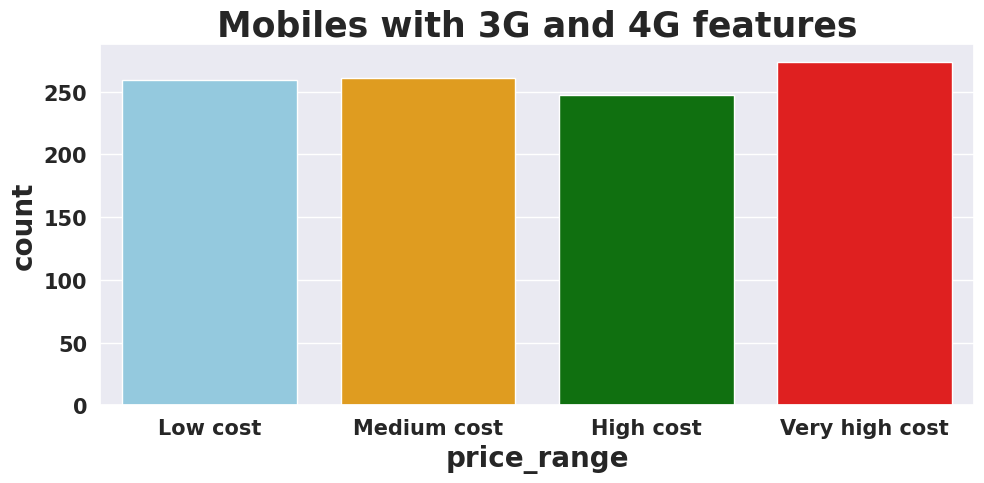

In [ ]:
custom_palette = {
    '0.0': 'skyblue',
    '1.0': 'orange',
    '2.0': 'green',
    '3.0': 'red'
}


plt.figure(figsize=(10,5))

sns.countplot(data=three_g_and_4g_df, x='price_range',palette=custom_palette)

plt.xticks(ticks=[0,1,2,3], labels=['Low cost','Medium cost','High cost','Very high cost'])
plt.title("Mobiles with 3G and 4G features")
plt.tight_layout()
plt.show()


As we can see from low cost to very high cost mobiles have both features.





**Mobiles with 3G**


In [ ]:
three_g_df=df[(df['three_g']==1) & (df['four_g']!=1)]

In [ ]:
three_g_df

battery_power  blue  clock_speed  dual_sim   fc  four_g  int_memory  \
3             615.0   1.0          2.5       0.0  0.0     0.0        10.0   
5            1859.0   0.0          0.5       1.0  3.0     0.0        22.0   
7            1954.0   0.0          0.5       1.0  0.0     0.0        24.0   
8            1445.0   1.0          0.5       0.0  0.0     0.0        53.0   
12           1815.0   0.0          2.8       0.0  2.0     0.0        33.0   
...             ...   ...          ...       ...  ...     ...         ...   
1983         1829.0   1.0          2.1       0.0  8.0     0.0        59.0   
1990          674.0   1.0          2.9       1.0  1.0     0.0        21.0   
1991         1467.0   1.0          0.5       0.0  0.0     0.0        18.0   
1992          858.0   0.0          2.2       0.0  1.0     0.0        50.0   
1994         1965.0   1.0          2.6       1.0  0.0     0.0        39.0   

      m_dep  mobile_wt  n_cores    pc  px_height  px_width     ram  sc_h  \
3       0.8      131.0      6.0   9.0     1216.0    1786.0  2769.0  16.0   
5       0.7      164.0      1.0   7.0     1004.0    1654.0  1067.0  17.0   
7       0.8      187.0      4.0   0.0      512.0    1149.0   700.0  16.0   
8       0.7      174.0      7.0  14.0      386.0     836.0  1099.0  17.0   
12      0.6      159.0      4.0  17.0      607.0     748.0  1482.0  18.0   
...     ...        ...      ...   ...        ...       ...     ...   ...   
1983    0.1       91.0      5.0  15.0     1457.0    1919.0  3142.0  16.0   
1990    0.2      198.0      3.0   4.0      576.0    1809.0  1180.0   6.0   
1991    0.6      122.0      5.0   0.0      888.0    1099.0  3962.0  15.0   
1992    0.1       84.0      1.0   2.0      528.0    1416.0  3978.0  17.0   
1994    0.2      187.0      4.0   3.0      915.0    1965.0  2032.0  11.0   

      sc_w  talk_time  three_g  touch_screen  wifi  price_range  
3      8.0       11.0      1.0           0.0   0.0          2.0  
5      1.0       10.0      1.0           0.0   0.0          1.0  
7      3.0        5.0      1.0           1.0   1.0          0.0  
8      1.0       20.0      1.0           0.0   0.0          0.0  
12     3.0        2.0      1.0           0.0   0.0          1.0  
...    ...        ...      ...           ...   ...          ...  
1983   6.0        5.0      1.0           1.0   1.0          3.0  
1990   3.0        4.0      1.0           1.0   1.0          0.0  
1991  11.0        5.0      1.0           1.0   1.0          3.0  
1992  16.0        3.0      1.0           1.0   0.0          3.0  
1994  10.0       16.0      1.0           1.0   1.0          2.0  

[480 rows x 21 columns]

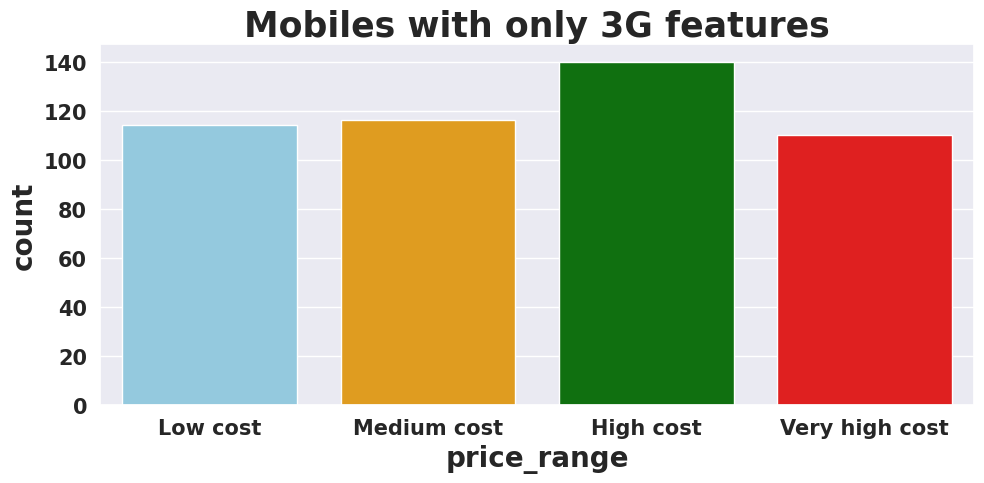

In [ ]:
custom_palette = {
    '0.0': 'skyblue',
    '1.0': 'orange',
    '2.0': 'green',
    '3.0': 'red'
}

plt.figure(figsize=(10,5))
sns.countplot(data=three_g_df, x='price_range', palette=custom_palette)
plt.xticks(ticks=[0,1,2,3], labels=['Low cost', 'Medium cost', 'High cost', 'Very high cost'])
plt.title("Mobiles with only 3G features")
plt.tight_layout()
plt.show()



Observations:

*   Mobiles which has very high cost are very less likely to have 3G.
*   There are more chances that high cost mobile will have 3G in it.




### **Mobiles that does not have 3G nor 4G.**

In [ ]:
No_3g_4G_df=df[(df['three_g']!=1) & (df['four_g']!=1)]

In [ ]:
No_3g_4G_df

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0             842.0   0.0          2.2       0.0   1.0     0.0         7.0   
10            769.0   1.0          2.9       1.0   0.0     0.0         9.0   
19            682.0   1.0          0.5       0.0   4.0     0.0        19.0   
22           1949.0   0.0          2.6       1.0   4.0     0.0        47.0   
30           1579.0   1.0          0.5       1.0   0.0     0.0         5.0   
...             ...   ...          ...       ...   ...     ...         ...   
1979         1454.0   0.0          2.6       0.0   8.0     0.0         6.0   
1980         1784.0   0.0          1.6       0.0   4.0     0.0        41.0   
1981         1262.0   0.0          1.8       1.0  12.0     0.0        34.0   
1986         1547.0   1.0          2.9       0.0   2.0     0.0        57.0   
1987          586.0   0.0          2.8       0.0   2.0     0.0        15.0   

      m_dep  mobile_wt  n_cores    pc  px_height  px_width     ram  sc_h  \
0       0.6      188.0      2.0   2.0       20.0     756.0  2549.0   9.0   
10      0.1      182.0      5.0   1.0      248.0     874.0  3946.0   5.0   
19      1.0      121.0      4.0  11.0      902.0    1064.0  2337.0  11.0   
22      0.3      199.0      4.0   7.0      407.0     822.0  1433.0  11.0   
30      0.2       88.0      7.0   9.0     1358.0    1739.0  3532.0  17.0   
...     ...        ...      ...   ...        ...       ...     ...   ...   
1979    0.4      199.0      3.0  20.0      698.0    1018.0  1300.0  10.0   
1980    0.4      164.0      6.0  20.0      610.0    1437.0  2313.0  14.0   
1981    0.1      149.0      5.0  16.0      223.0     737.0  3248.0  13.0   
1986    0.4      114.0      1.0   3.0      347.0     957.0  1620.0   9.0   
1987    0.2       83.0      3.0  11.0      241.0     854.0  2592.0  12.0   

      sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0      7.0       19.0      0.0           0.0   1.0          1.0  
10     2.0        7.0      0.0           0.0   0.0          3.0  
19     1.0       18.0      0.0           1.0   1.0          1.0  
22     5.0       20.0      0.0           0.0   1.0          1.0  
30    11.0       12.0      0.0           0.0   1.0          3.0  
...    ...        ...      ...           ...   ...          ...  
1979   9.0        2.0      0.0           0.0   1.0          1.0  
1980   1.0       11.0      0.0           1.0   0.0          2.0  
1981   3.0        4.0      0.0           1.0   1.0          2.0  
1986   2.0       19.0      0.0           1.0   1.0          1.0  
1987   8.0        3.0      0.0           0.0   0.0          1.0  

[477 rows x 21 columns]

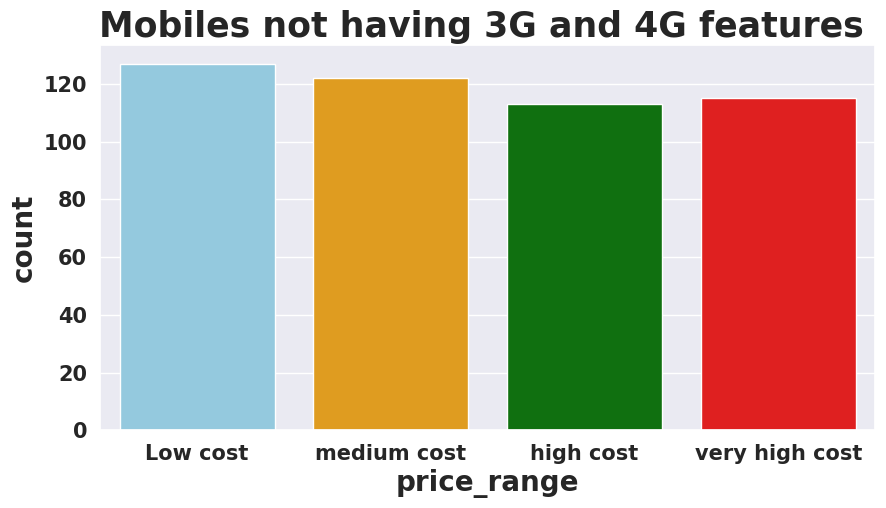

In [ ]:
plt.figure(figsize=(10,5))
custom_palette = {
    '0.0': 'skyblue',
    '1.0': 'orange',
    '2.0': 'green',
    '3.0': 'red'
}
sns.countplot(data=No_3g_4G_df,x='price_range', palette=custom_palette)
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()



*   Its very obvious that low cost mobiles will not have 3G and 4G.
*   Mobiles with very high cost may have 5G. As we know technologies
     changes everytime.




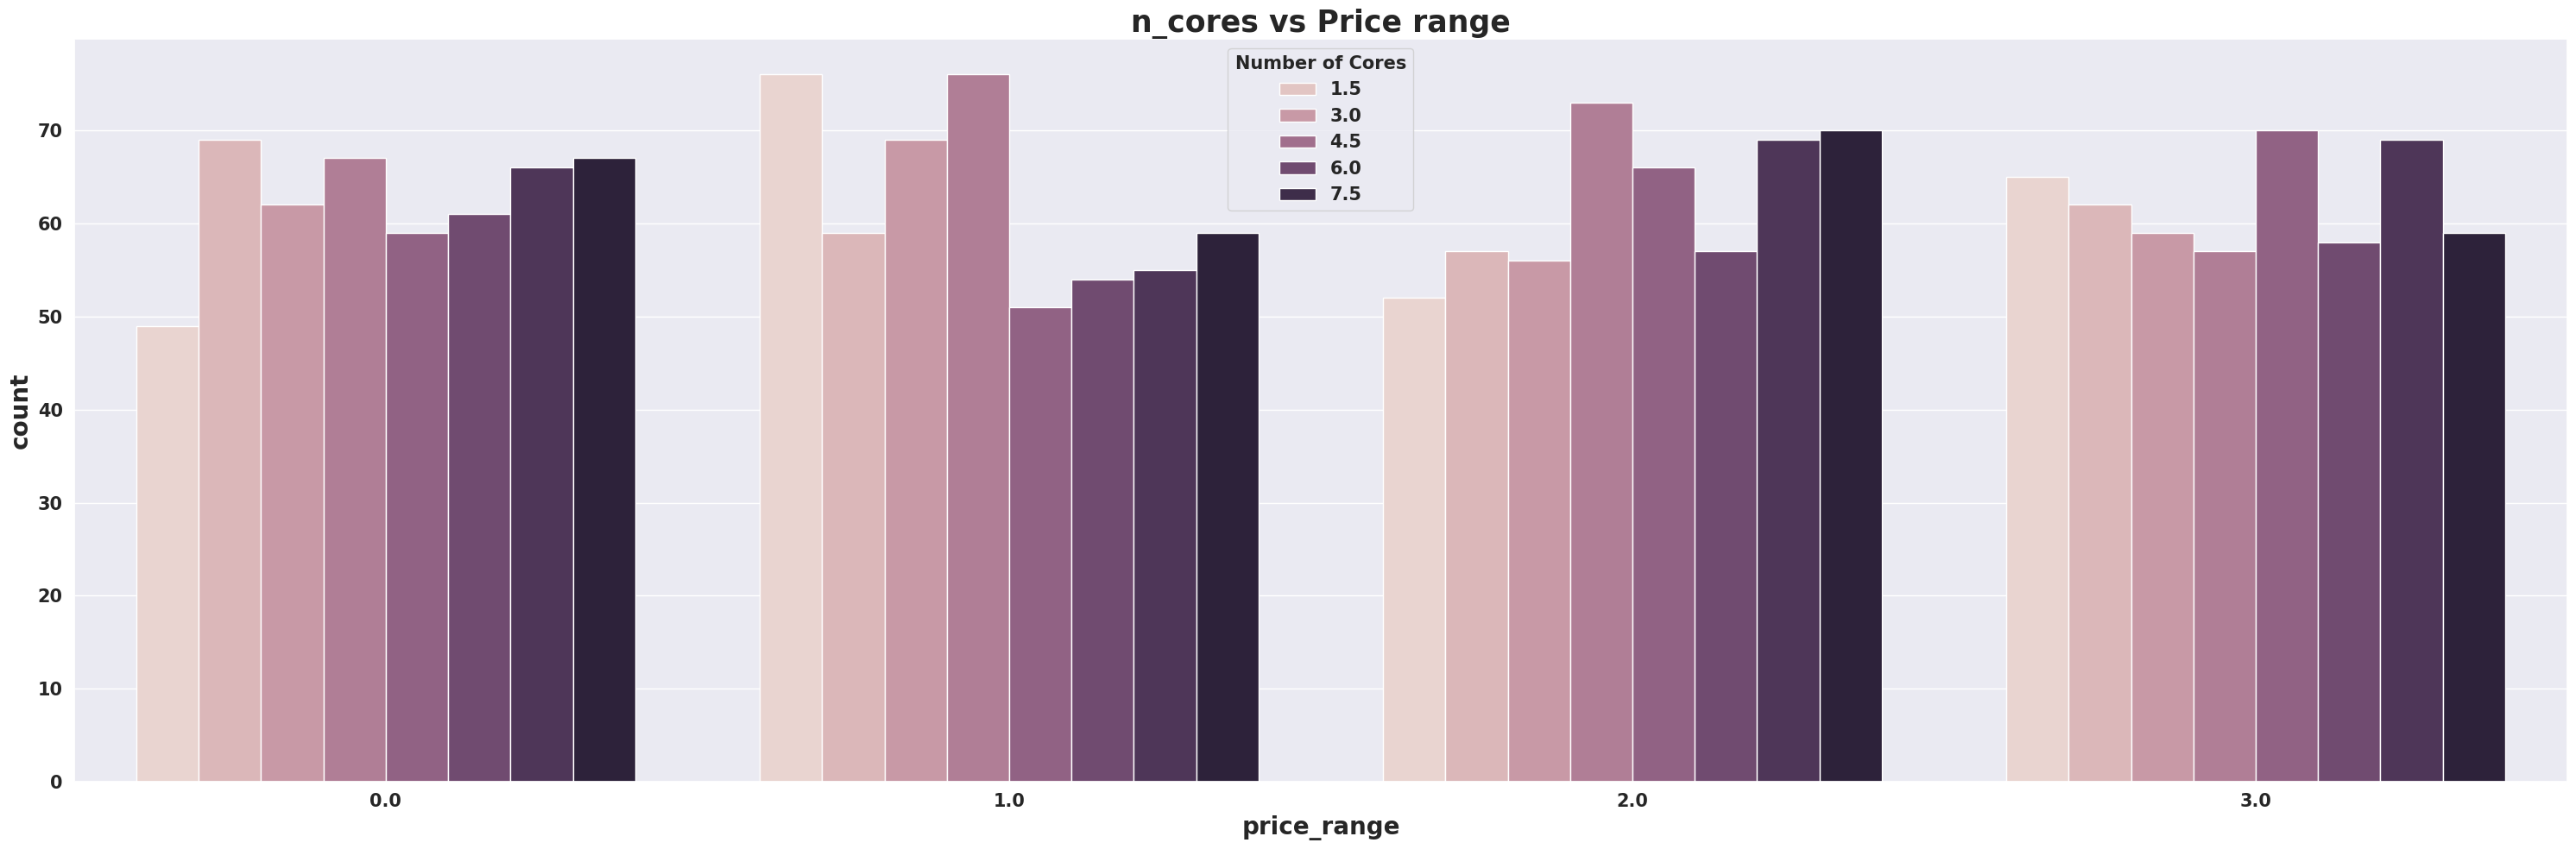

In [ ]:
# n_cores v/s price range
plt.figure(figsize=(30,10))
sns.countplot(data=df, x='price_range', hue='n_cores')
plt.title("n_cores vs Price range")
plt.legend(title='Number of Cores', loc='best')
plt.tight_layout()
plt.show()

Observations:


*   Price range 0 has majority of phones with 2 core processors
*   Price range 1 has majority of phones with 1 and 4 core processors
*   Price range 2 has majority of phones with 4 core processors
*   Price range 3 has majority of phones with 5 and 7 core processors



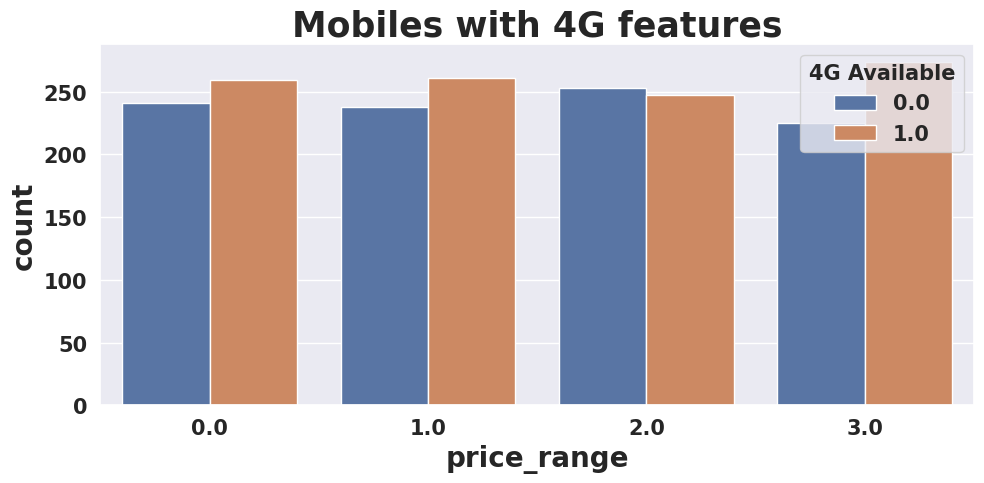

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(data=df, x='price_range', hue='four_g')

plt.title("Mobiles with 4G features")
plt.legend(title='4G Available', loc='best')
plt.tight_layout()
plt.show()

**Observation:** Majority of phones of only price range 2 dont have 4G service.

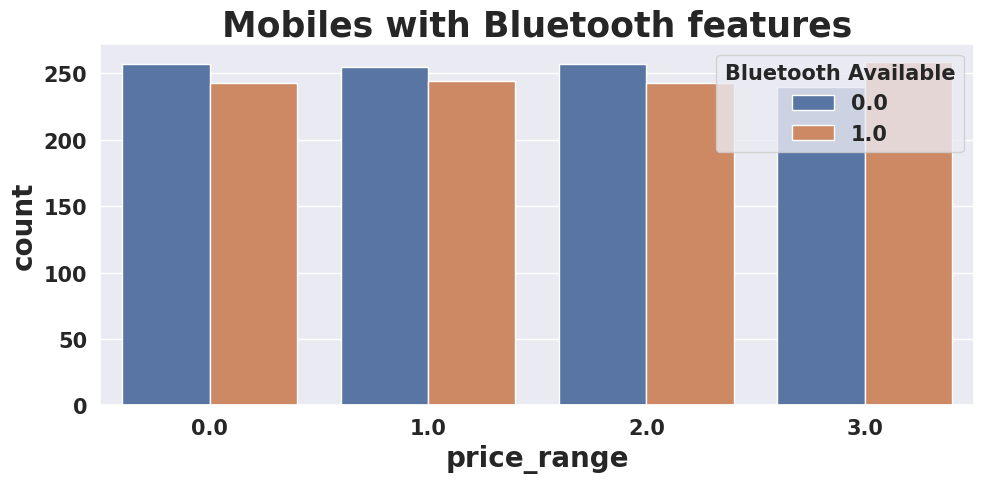

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(data=df, x='price_range', hue='blue')

plt.title("Mobiles with Bluetooth features")
plt.legend(title='Bluetooth Available', loc='best')
plt.tight_layout()
plt.show()

**Observation:** Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service.

# Distribution of numerical columns and Outliers

In [ ]:
# numeric col list
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

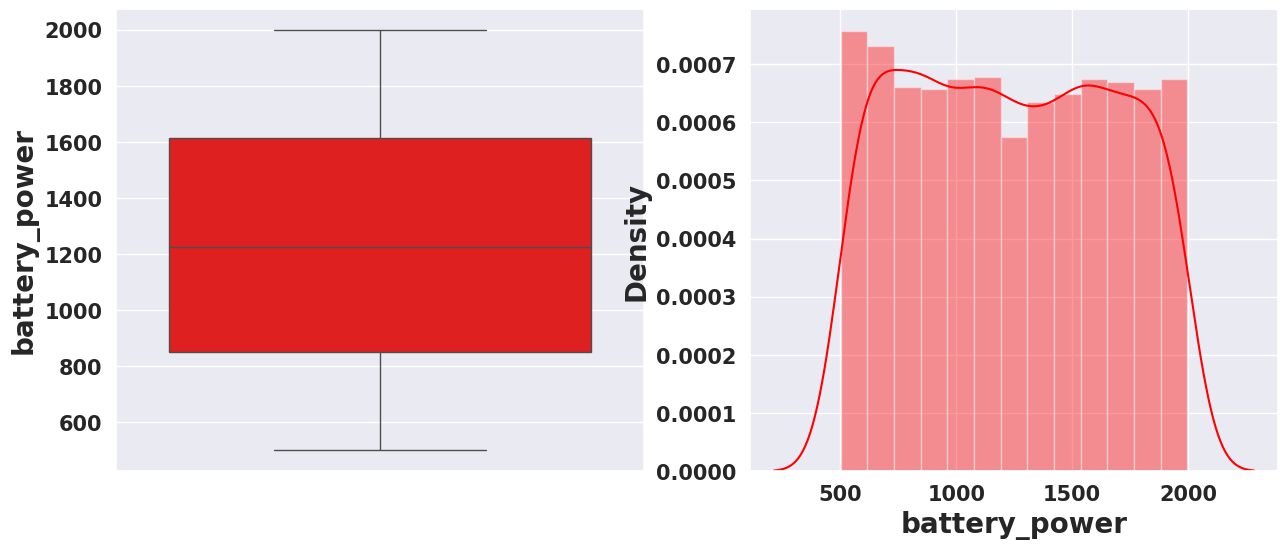

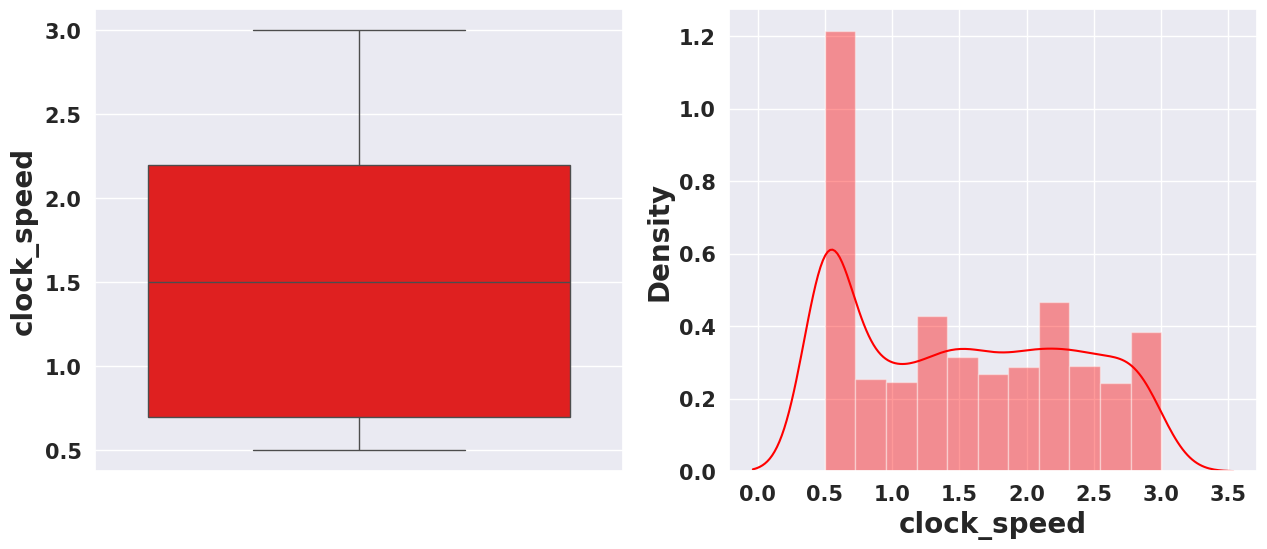

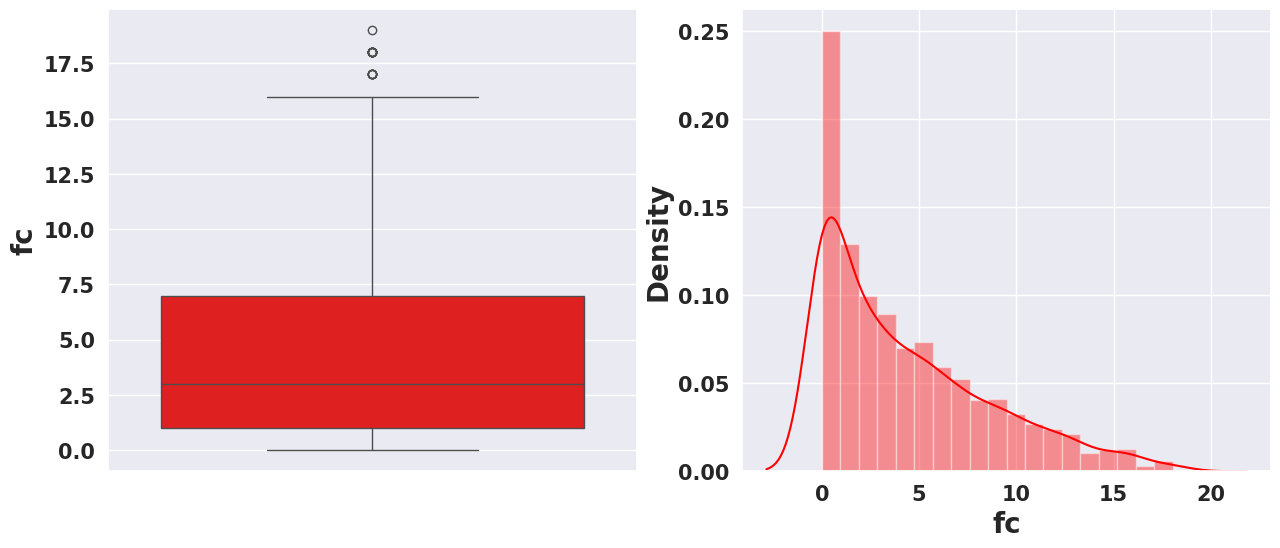

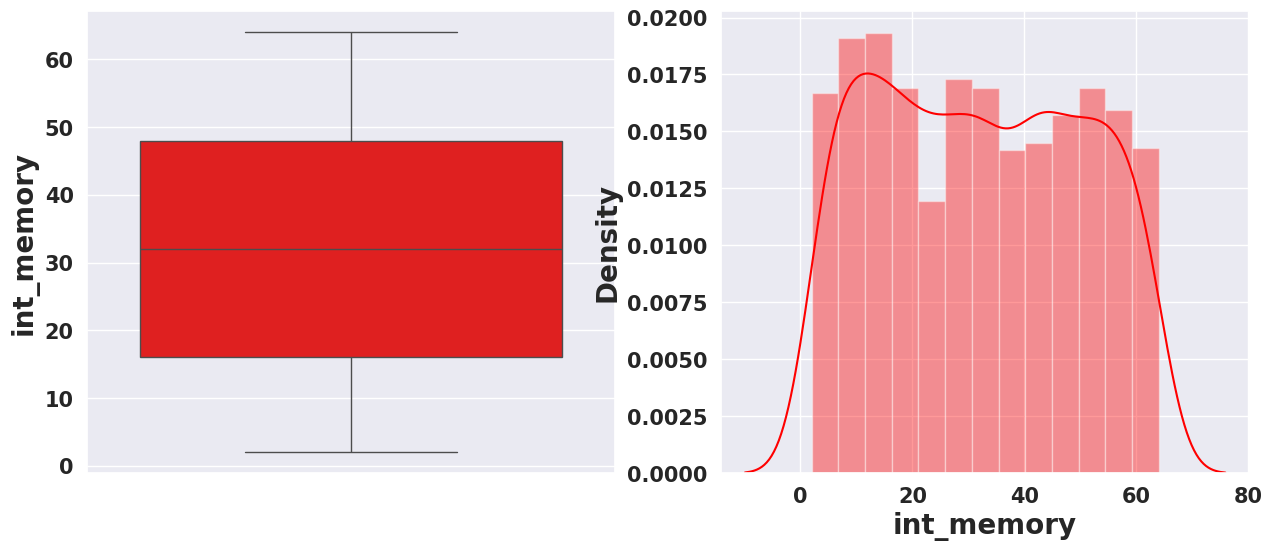

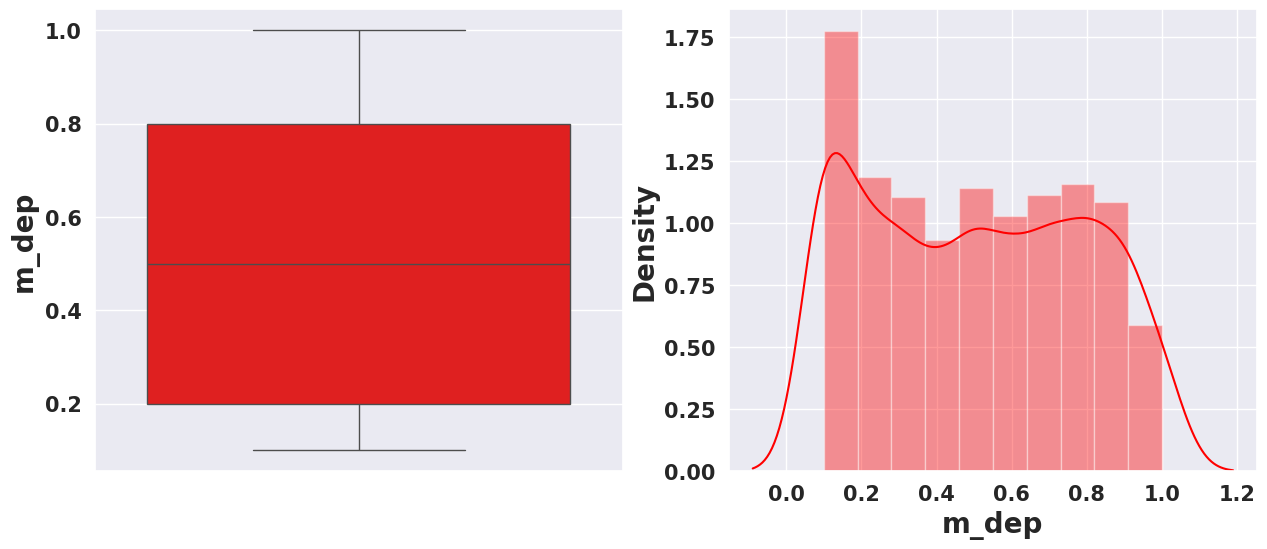

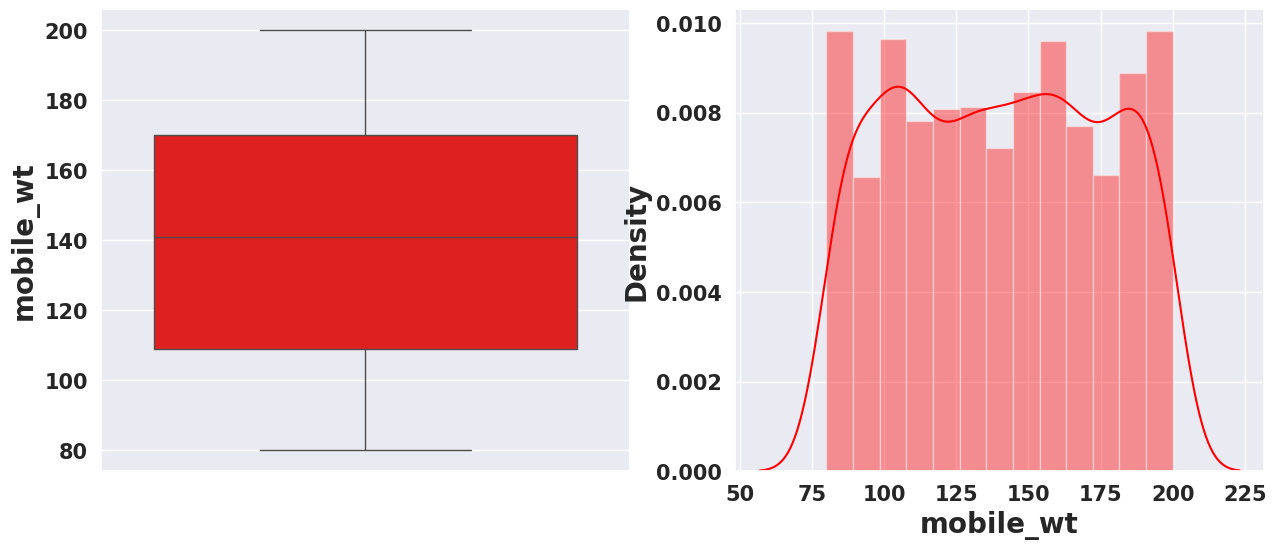

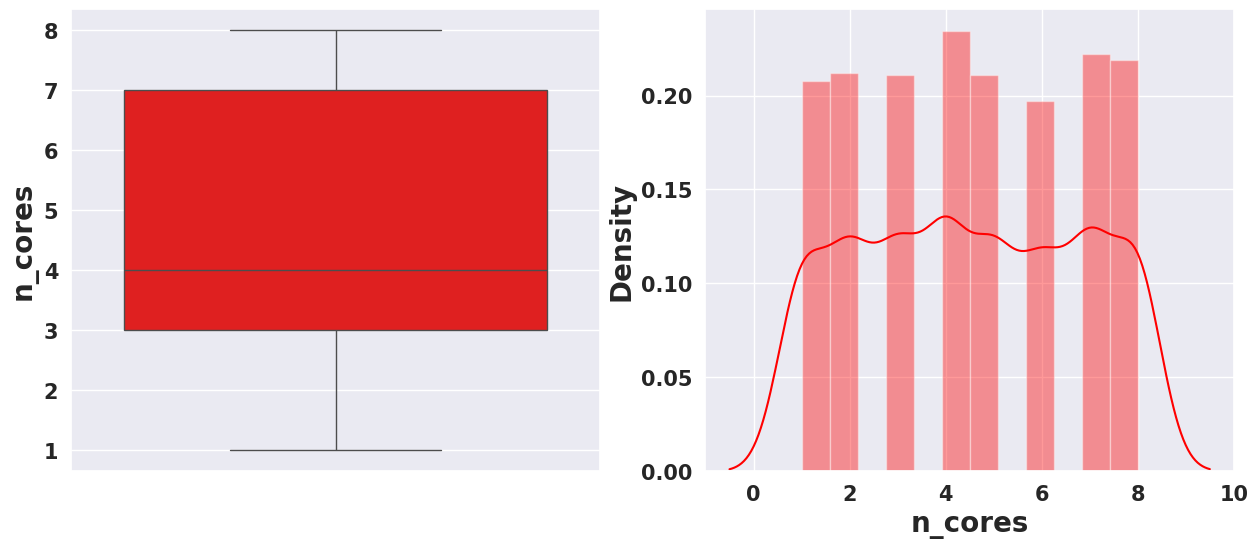

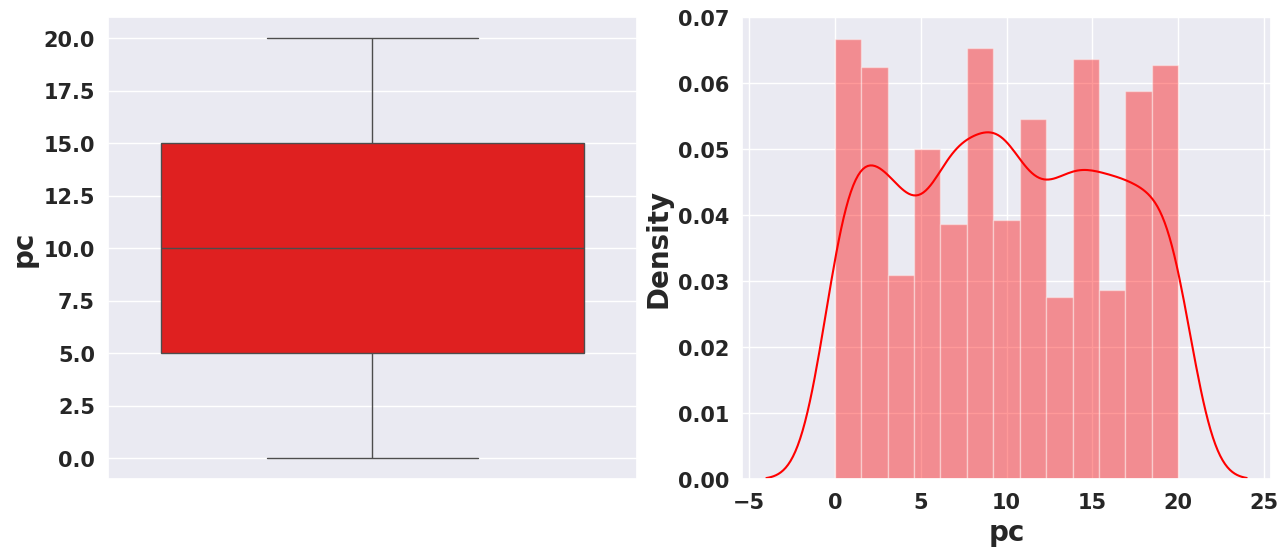

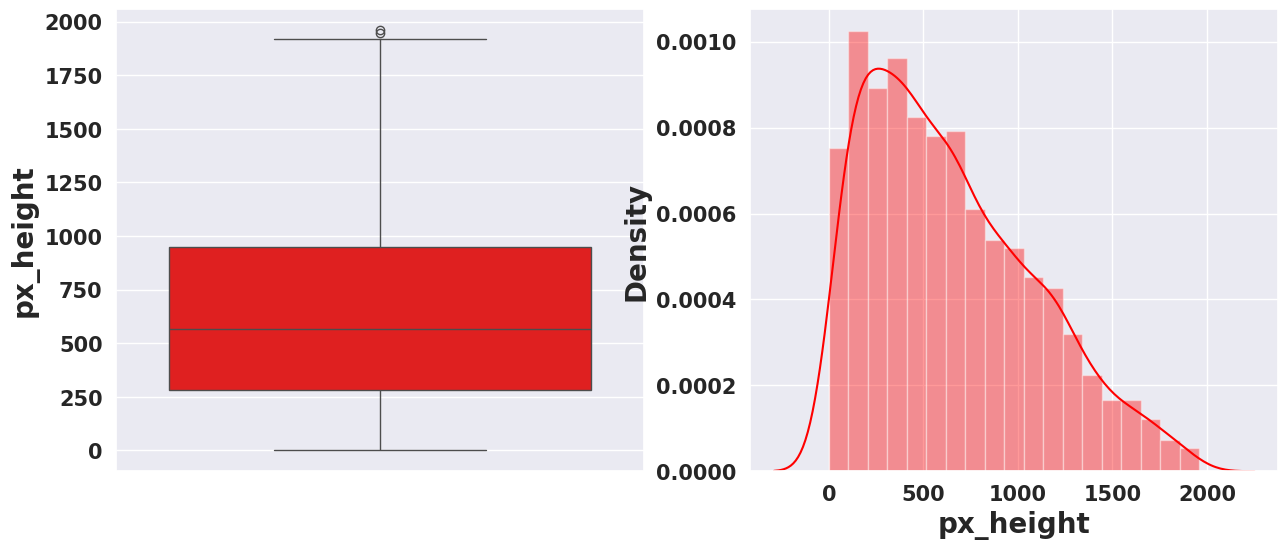

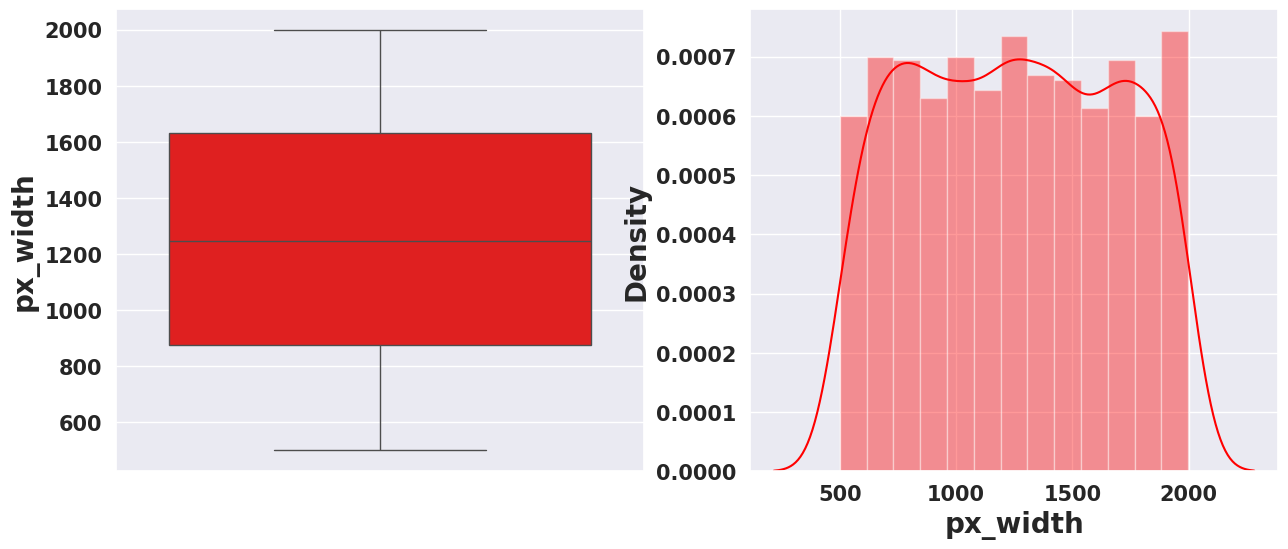

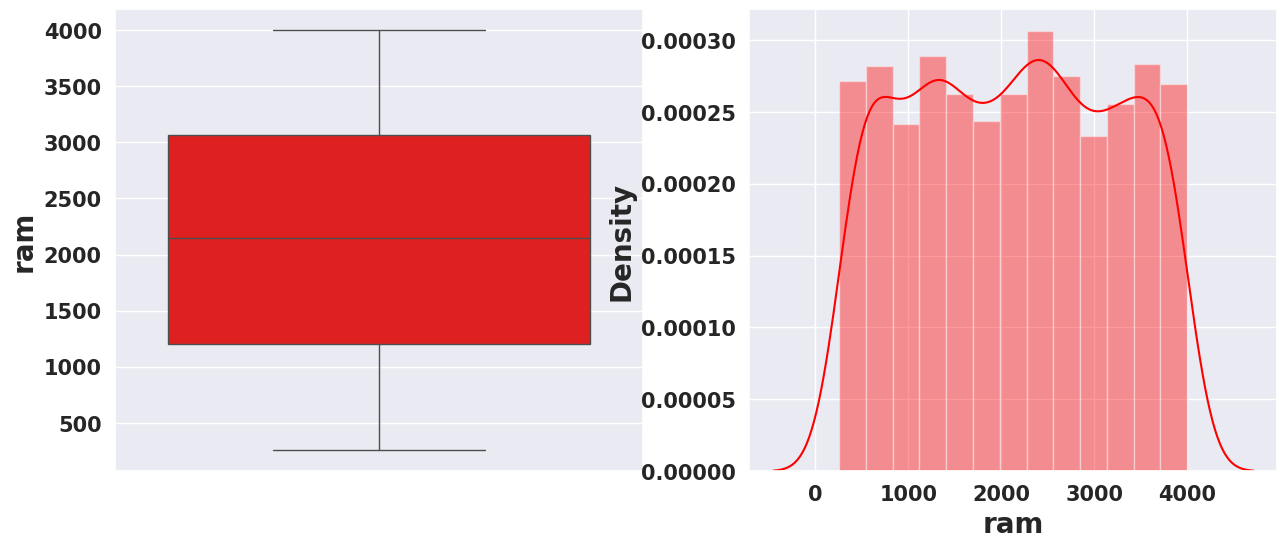

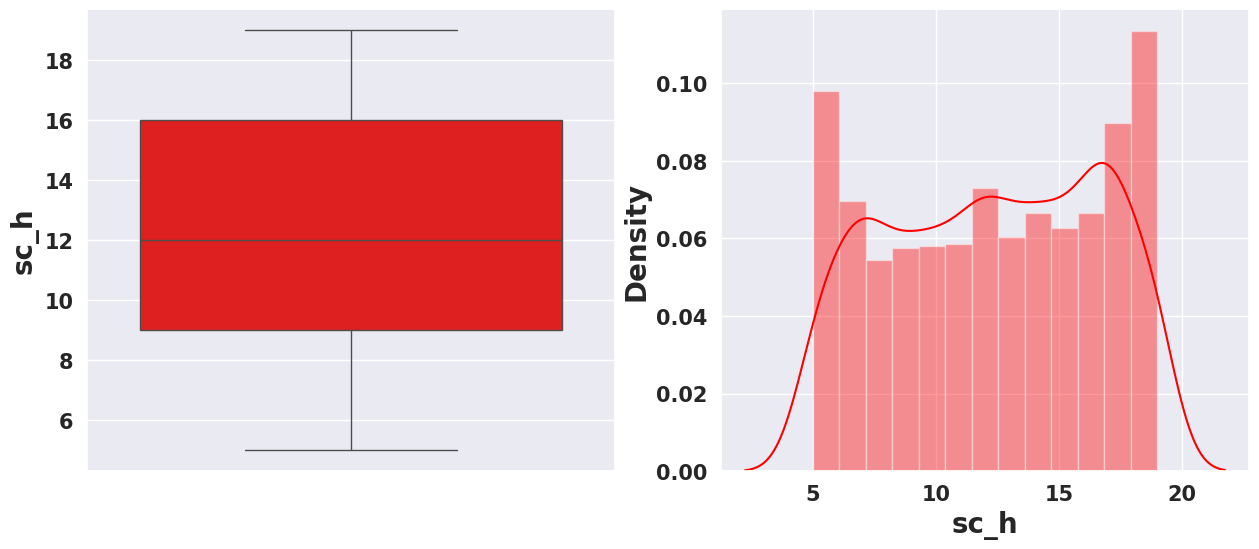

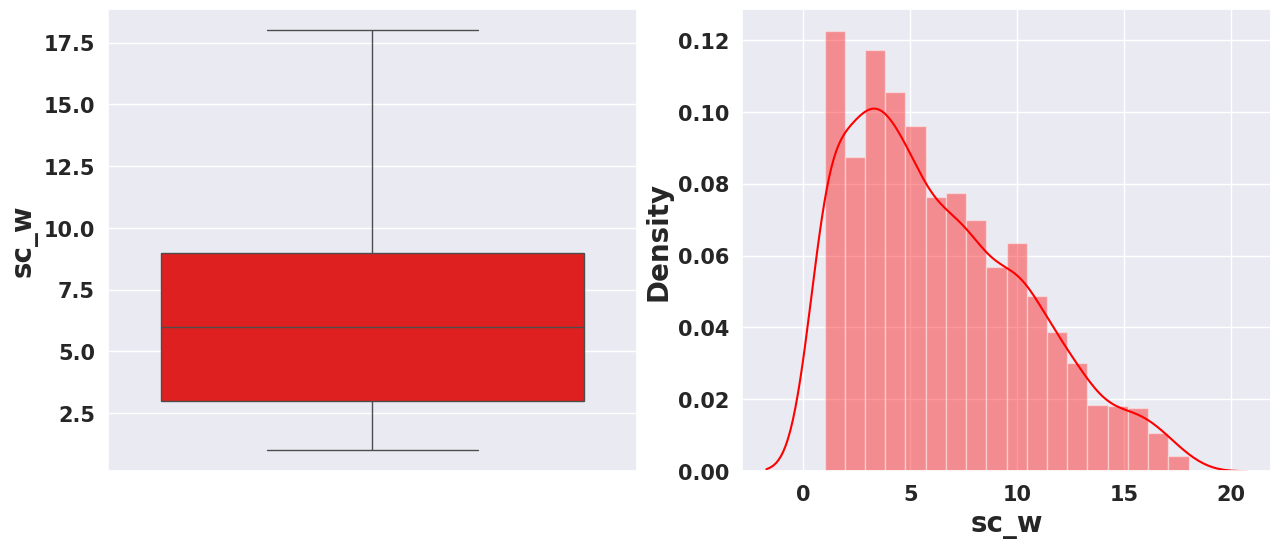

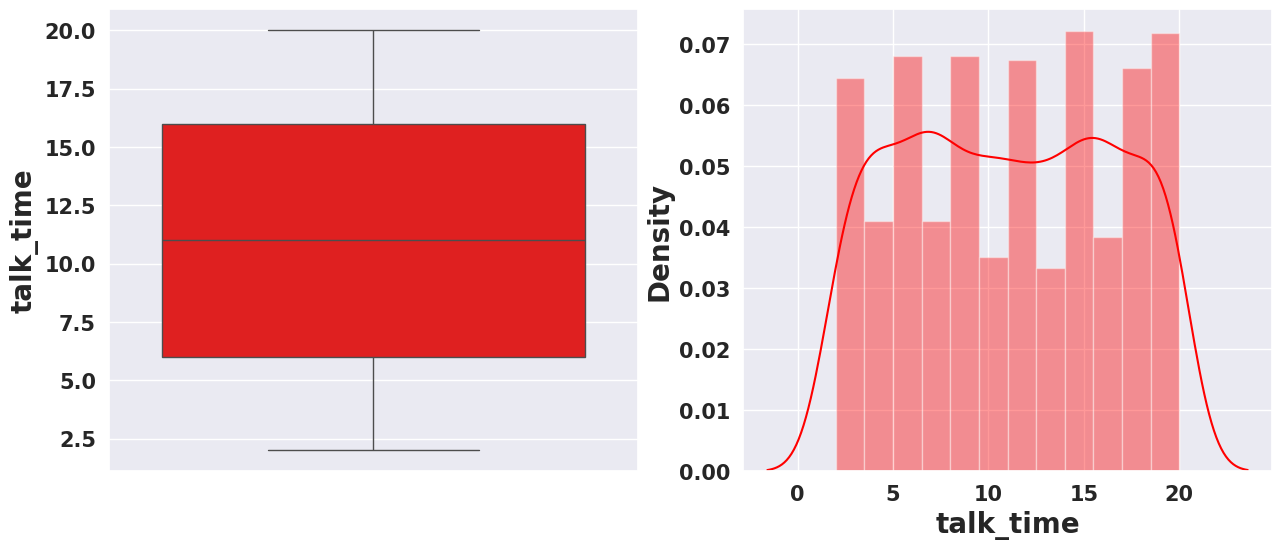

In [ ]:
# plotting boXplot and distribution
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='red')

    fig.set_xlabel(var)

    plt.show()

**Observations:**
Data is well distributed
fc and px_height has some outliers.

# **Outlier Treatment**



In [ ]:
Q1 = df["fc"].quantile(0.25)
Q3 = df['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['fc'] <= Q3)]

In [ ]:
Q1 = df["px_height"].quantile(0.25)
Q3 = df['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df= df[(df['px_height'] <= Q3)]

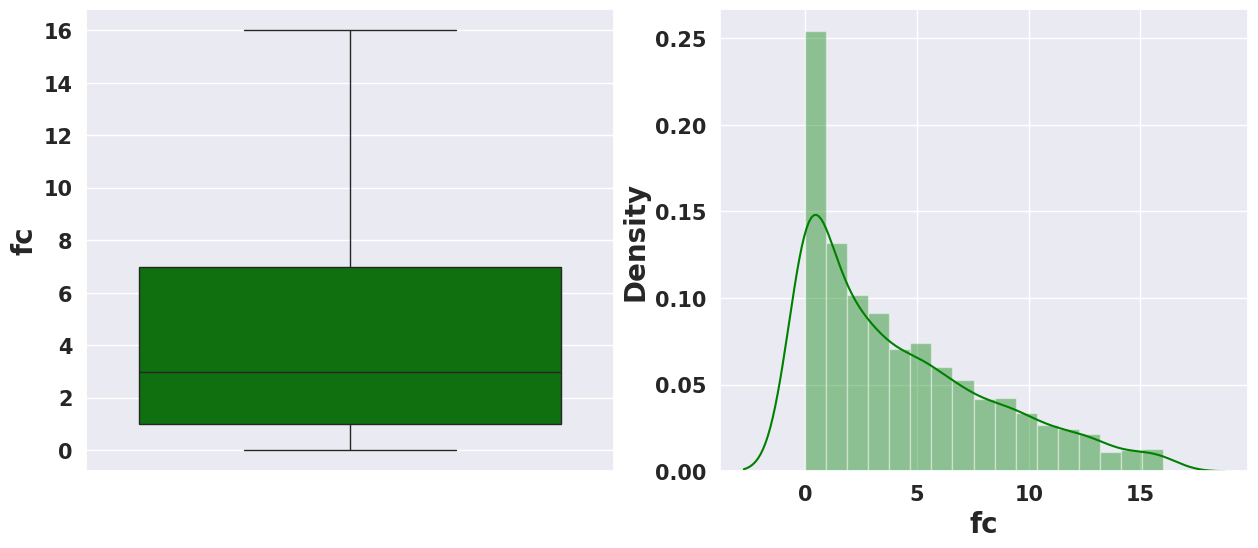

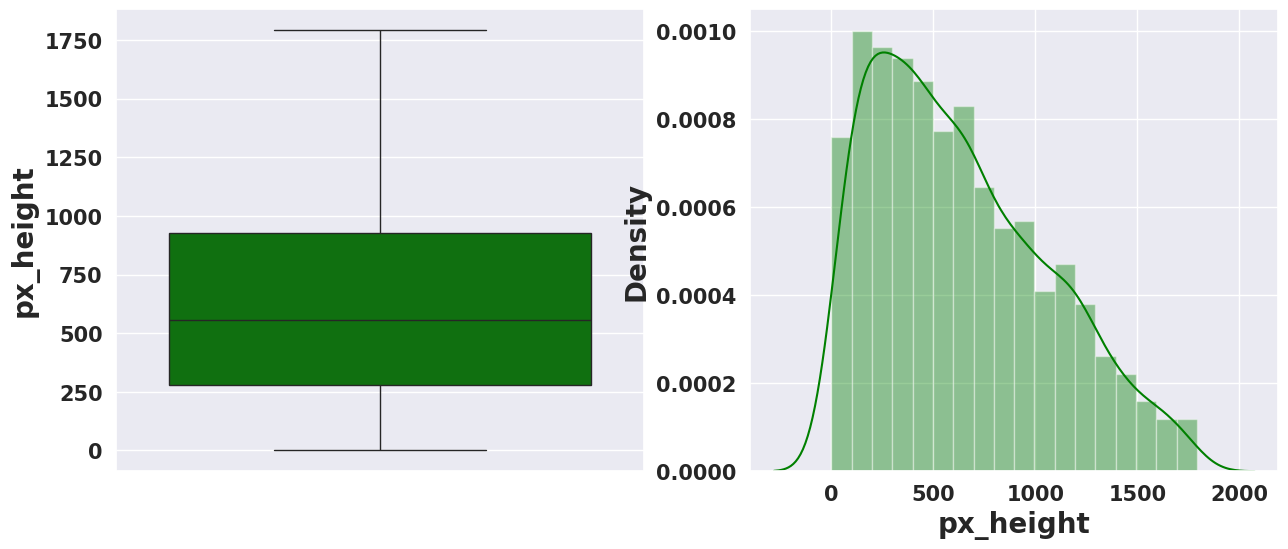

In [ ]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='green')

    fig.set_xlabel(var)

    plt.show()

**Observation:** Thus we can see in box plot no oultiers are present.

In [ ]:
df.shape

(1962, 21)








So, Outliers have been handled.

In [ ]:
# create copy of dataframe
Modified_df=df.copy()

# Separating X variables(indpendent variables) and Y(dependent variable) variable.


In [ ]:
X=df.drop('price_range',axis=1)
y=df["price_range"]

# **Predictive Modeling:**

Predictive modeling is a process of using statistical and machine learning techniques to analyze data and build models that can be used to predict future outcomes or behavior. It involves identifying patterns and relationships in historical data and using this information to develop models that can be used to predict future events or behaviors with a high degree of accuracy.

Algorithms used for predictive modeling:

Decision Tree

Random Forest classifier

Gradient Boosting Classifier

K-nearest Neighbour classifier

XG Boost Classifier

Support Vector Machine(SVM)

**As Decision tree,random forest and enssembles trees do not require Feature scaling as these are Tree based models. So we will be using X_train and X_test which are not scaled.**


**For K nearest Neighbors and SVM  we will be usingseX_train_scaled and X_test_scaled. That is we we will use Standardised data. i.e. Scaled data.
As these are distance based Algorithms.**

In [ ]:
# importing all essential libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
# splitting the data into Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1471, 20)
(491, 20)
(1471,)
(491,)


In [ ]:

# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test

In [ ]:
X_train_scaled

array([[-1.00937328,  1.03107401,  0.95349925, ...,  0.56819163,
         1.02827168,  1.00068004],
       [ 0.08864226,  1.03107401,  1.56657618, ...,  0.56819163,
         1.02827168, -0.99932042],
       [ 1.03858517, -0.96986249,  1.56657618, ...,  0.56819163,
         1.02827168, -0.99932042],
       ...,
       [-0.36240977,  1.03107401,  0.5856531 , ..., -1.75996961,
        -0.97250563,  1.00068004],
       [ 0.87684429, -0.96986249, -0.76311615, ...,  0.56819163,
         1.02827168, -0.99932042],
       [ 0.74016186, -0.96986249, -1.2535777 , ...,  0.56819163,
        -0.97250563, -0.99932042]])

In [ ]:
X_test_scaled

array([[-0.25306382,  1.03107401, -1.2535777 , ...,  0.56819163,
         1.02827168, -0.99932042],
       [-1.68822937,  1.03107401, -1.2535777 , ..., -1.75996961,
        -0.97250563, -0.99932042],
       [ 1.55797841,  1.03107401,  0.21780694, ...,  0.56819163,
        -0.97250563, -0.99932042],
       ...,
       [-0.41708274, -0.96986249,  1.07611464, ...,  0.56819163,
         1.02827168, -0.99932042],
       [-1.61988815, -0.96986249, -0.51788538, ..., -1.75996961,
         1.02827168, -0.99932042],
       [-0.66538916, -0.96986249, -1.2535777 , ...,  0.56819163,
        -0.97250563,  1.00068004]])

In [ ]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

  # plotting
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
# creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

# **1)Decision Tree Classifier:**

**Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.**
**So here we will use X_train,X_test,y_test and Y_train which are not scaled.**

***Decision Tree with default hyperparameters:***

In [ ]:
# Creating object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)


In [ ]:
# fitting/training the train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [ ]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8472505091649695

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[125,  13,   0,   0],
       [ 11,  87,  17,   0],
       [  0,  12, 101,   6],
       [  0,   0,  16, 103]])

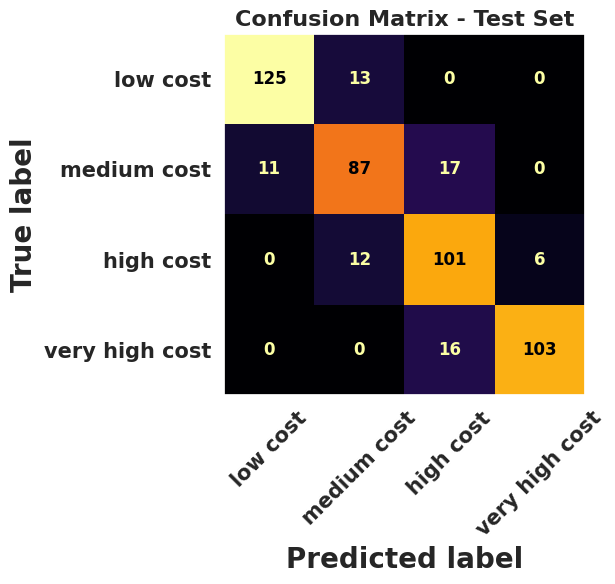

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Get confusion matrix values
cm = confusion_matrix(y_test, dtc.predict(X_test))

# Create a display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(
    cmap='inferno',
    values_format='d',
    xticks_rotation=45,
    colorbar=False,
    ax=ax  # pass the axes to the plot
)

ax.set_title('Confusion Matrix - Test Set', fontsize=16)
ax.grid(False)
plt.tight_layout()
plt.show()



In [ ]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       138
         1.0       0.78      0.76      0.77       115
         2.0       0.75      0.85      0.80       119
         3.0       0.94      0.87      0.90       119

    accuracy                           0.85       491
   macro avg       0.85      0.84      0.85       491
weighted avg       0.85      0.85      0.85       491



* ***Train set accuracy is 100% and test accuracy is 84%.***
* ***Model is overfitted on train set and did not generalised well.***
* ***We will tune hyperparamters to reduce overfitting and try to imporve the model performance.***

### **Let's tune some hypereparameters of Decsion Tree classifier:**

In [ ]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [ ]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [ ]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   # model fitting.

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

In [ ]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3,
                       random_state=0)

In [ ]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9782460910944936

In [ ]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.8391038696537678

In [ ]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[129,   9,   0,   0],
       [ 12,  91,  12,   0],
       [  0,  19,  89,  11],
       [  0,   0,  16, 103]])

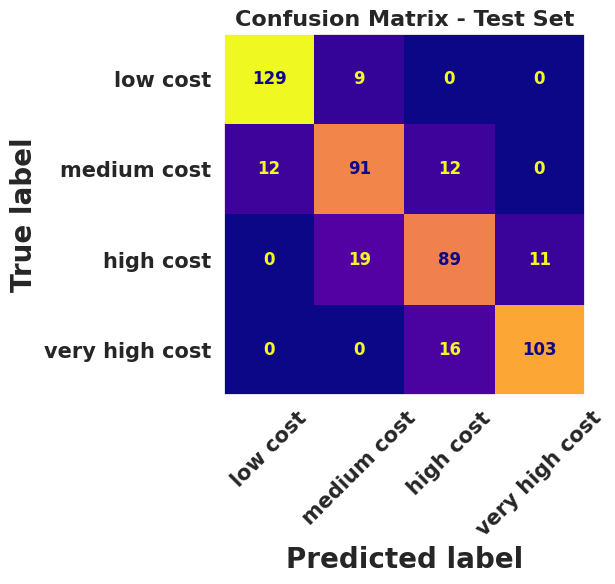

In [ ]:
# plotting confusion matrix for test set.
# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Create a display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(
    cmap='plasma',
    values_format='d',
    xticks_rotation=45,
    colorbar=False,
    ax=ax  # pass the axes to the plot
)

ax.set_title('Confusion Matrix - Test Set', fontsize=16)
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       356
         1.0       0.96      0.98      0.97       376
         2.0       0.98      0.97      0.98       372
         3.0       0.99      0.99      0.99       367

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



In [ ]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       138
         1.0       0.76      0.79      0.78       115
         2.0       0.76      0.75      0.75       119
         3.0       0.90      0.87      0.88       119

    accuracy                           0.84       491
   macro avg       0.84      0.83      0.84       491
weighted avg       0.84      0.84      0.84       491



In [ ]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and
  plots the feature importance graph'''

  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'], palette='husl')
  plt.title('Feature Importance')

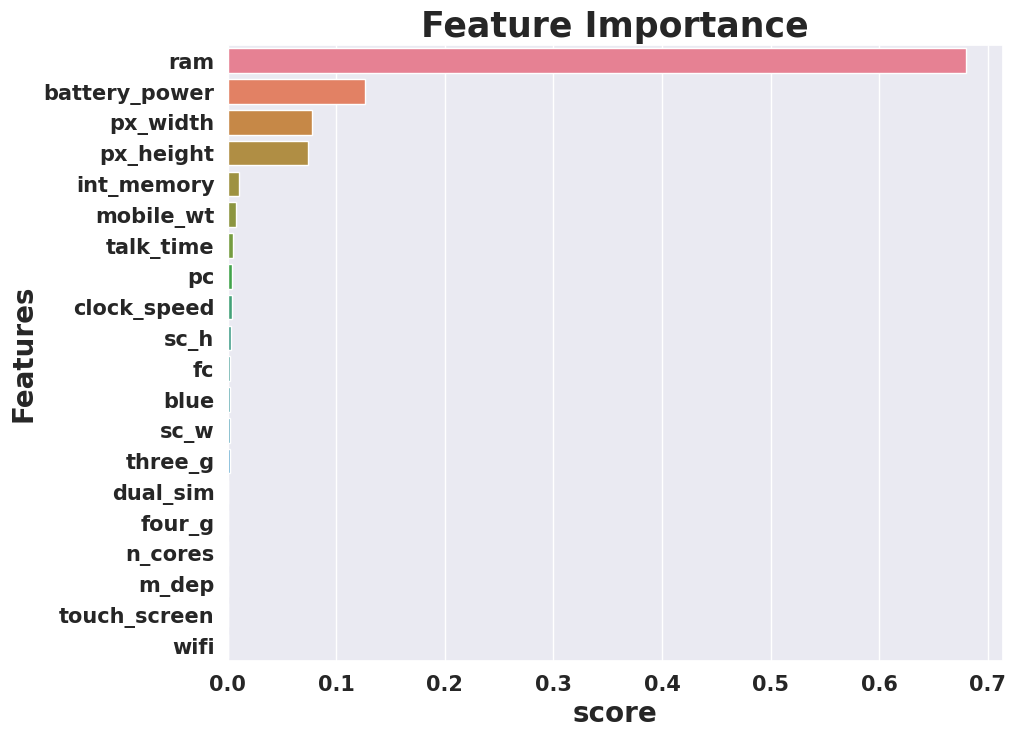

In [ ]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

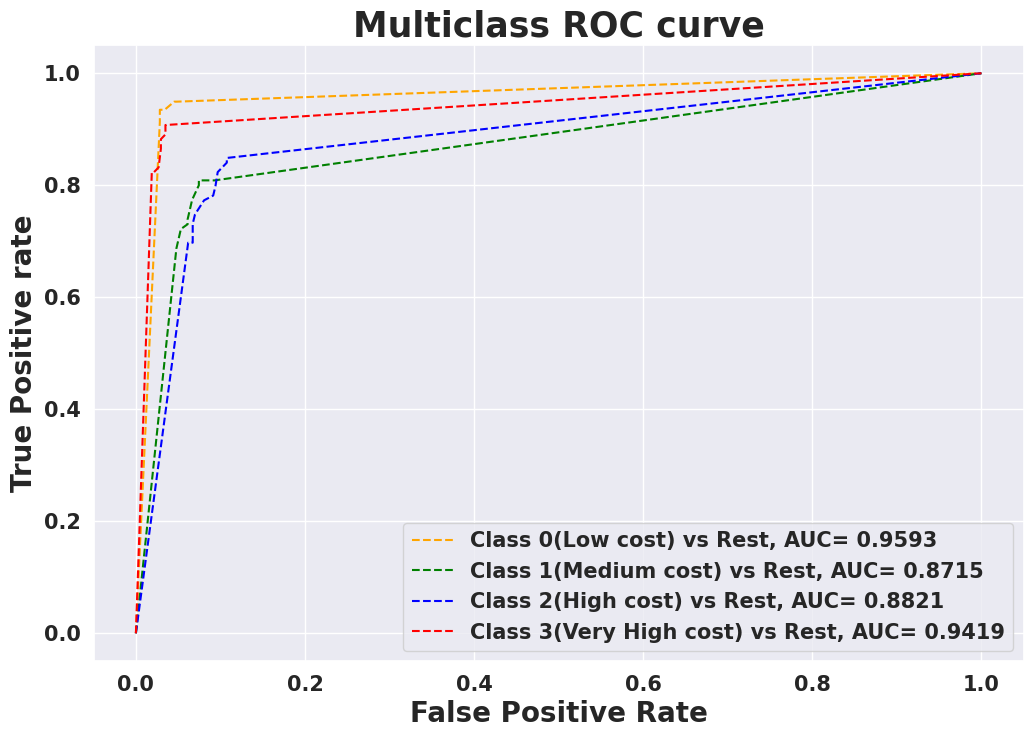

In [ ]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Decision Tree Classifier-Observations:**
* ***Train accuarcy has been reduced to 98% from 100% and test accuarcy is increased by 1% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.***

* ***RAM,battery power,px_height and width came out to be the most important featrures***
* ***This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.96 for both classes,whereas for class 1 and class 2 it is 0.88.***

# **2) Random Forest classifier:**

### **With default hyperparamters:**

In [ ]:
# splitting the data into trainset and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# creating an object of the classifier.
rfc=RandomForestClassifier(random_state=0)

In [ ]:
# fitting/training the model.
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# predicting the y values of train set and test set.
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.8676171079429735

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[130,   8,   0,   0],
       [  9,  94,  12,   0],
       [  0,  19,  92,   8],
       [  0,   0,   9, 110]])

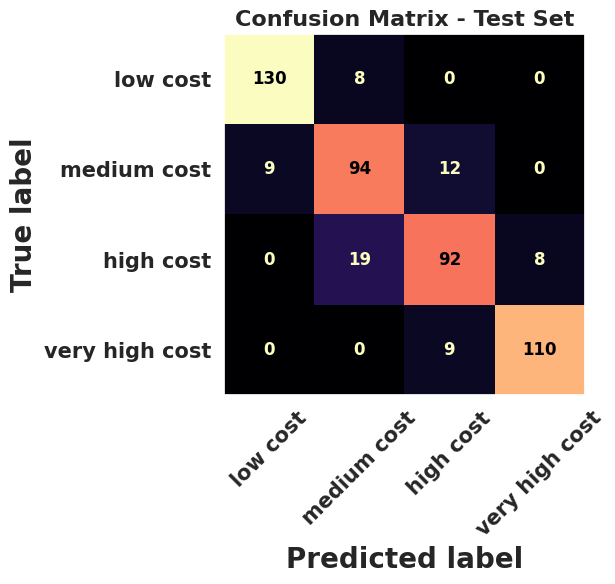

In [ ]:

# plotting confusion matrix for test set.
# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Create a display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(
    cmap='magma',
    values_format='d',
    xticks_rotation=45,
    colorbar=False,
    ax=ax  # pass the axes to the plot
)

ax.set_title('Confusion Matrix - Test Set', fontsize=16)
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# printing the classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
# printing the classification report for train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       138
         1.0       0.78      0.82      0.80       115
         2.0       0.81      0.77      0.79       119
         3.0       0.93      0.92      0.93       119

    accuracy                           0.87       491
   macro avg       0.86      0.86      0.86       491
weighted avg       0.87      0.87      0.87       491



* ***Train accuarcy is 100% and test accuracy is 88%. which is quite good. But model seems to be overfitted and has not generalised the data well. We need to reduce overfitting and improve the model performance.***
* ***we do some hyperparameter tunning to reduce overfitting***

### **Let's do some Hyperparamter Tunning of the Random forest model**

In [ ]:
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']

             }

In [ ]:
# creating the instance
rfc_= RandomForestClassifier(random_state=0)

In [ ]:
# Applying GridSearchCV
rfc_tune=GridSearchCV(rfc_,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=nan total time=   

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 700]},
             scoring='accuracy', verbose=3)

In [ ]:
#Getting best paramters for the models
rfc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 700}

In [ ]:
# fitting/training the data with best parameters.
rfc_optimal=RandomForestClassifier(max_features='sqrt',criterion='entropy',max_depth=None,max_leaf_nodes=None,min_samples_split=6,n_estimators=700,random_state=0)
rfc_optimal.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=6,
                       n_estimators=700, random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [ ]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

0.8757637474541752

In [ ]:
# getting confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[129,   9,   0,   0],
       [  7,  95,  13,   0],
       [  0,  18,  96,   5],
       [  0,   0,   9, 110]])

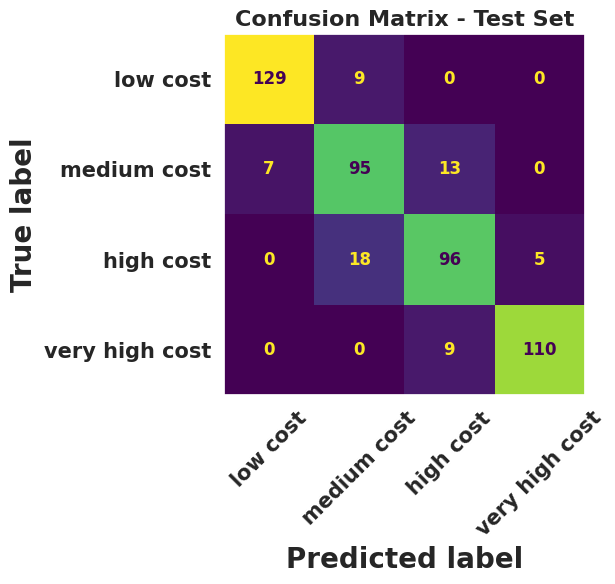

In [ ]:

# plotting confusion matrix for test set.
# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Create a display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(
    cmap='viridis',
    values_format='d',
    xticks_rotation=45,
    colorbar=False,
    ax=ax  # pass the axes to the plot
)

ax.set_title('Confusion Matrix - Test Set', fontsize=16)
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       138
         1.0       0.78      0.83      0.80       115
         2.0       0.81      0.81      0.81       119
         3.0       0.96      0.92      0.94       119

    accuracy                           0.88       491
   macro avg       0.87      0.87      0.87       491
weighted avg       0.88      0.88      0.88       491



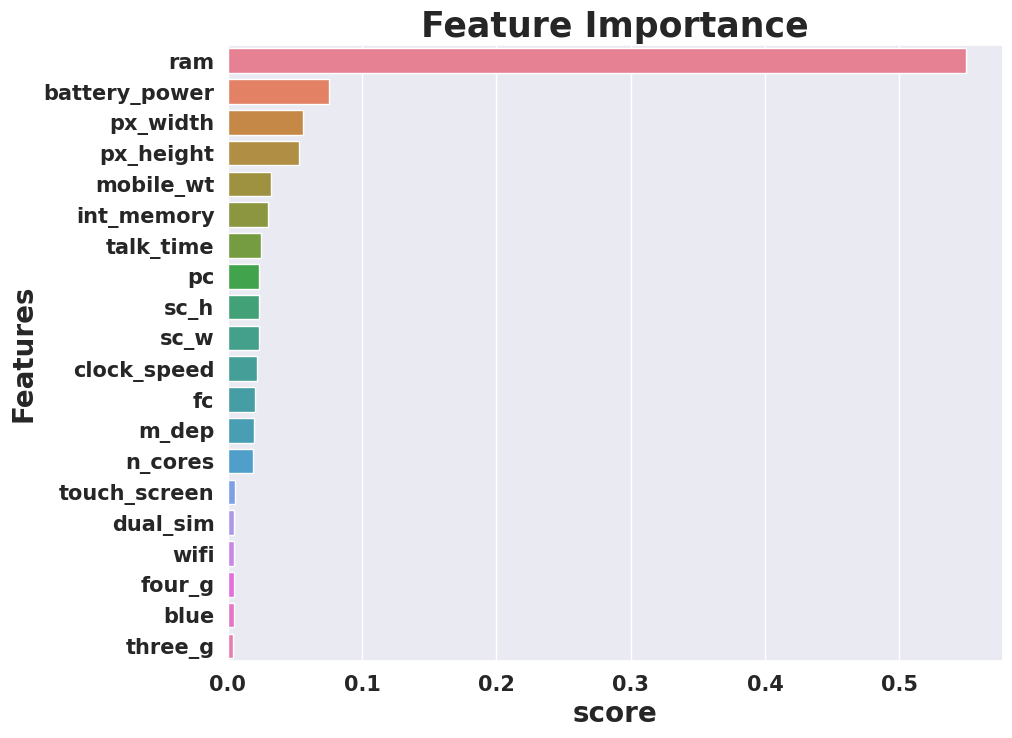

In [ ]:
#plotting feature importances
plot_feature_importance(rfc_optimal)

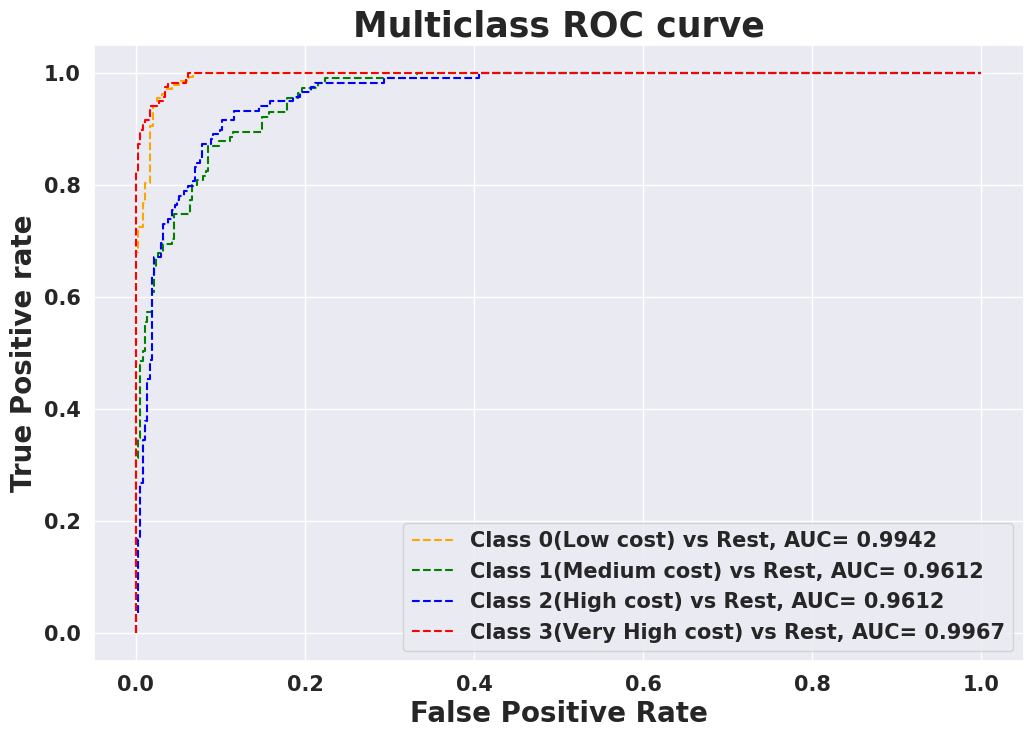

In [ ]:
# Plot AUC ROC curve.
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

###**Observations of Random Forest:**
***Before Tuning***
* ***training accuarcy = 100%***
* ***test accuarcy = 88%***

***Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.***

***After tuning:***
* ***Training accuarcy= 100%***
* ***Test accuarcy = 90%***

***we have slightly improved the model and overfitting is reduced slightly.***

***From roc curve its clear that model has poorly performed to classify class 1 and class 2.***

# **3)Gradient Boosting Classifier:**

### **With default hyperparameters:**

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [ ]:
# fittng/training the data.
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [ ]:
# checking the accuracy score of train data.
accuracy_score(y_train,y_train_pred)

0.9993201903467029

In [ ]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.8981670061099797

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[131,   7,   0,   0],
       [  9,  99,   7,   0],
       [  0,  12, 102,   5],
       [  0,   0,  10, 109]])

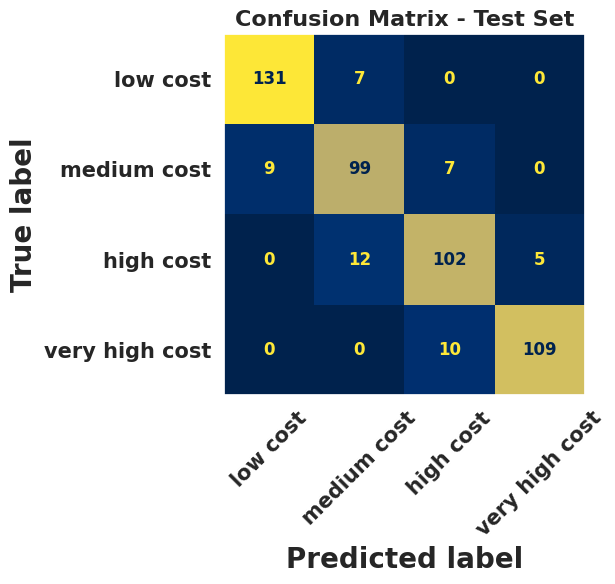

In [ ]:
# plotting confusion matrix for test set.
# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Create a display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(
    cmap='cividis',
    values_format='d',
    xticks_rotation=45,
    colorbar=False,
    ax=ax  # pass the axes to the plot
)

ax.set_title('Confusion Matrix - Test Set', fontsize=16)
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       138
         1.0       0.84      0.86      0.85       115
         2.0       0.86      0.86      0.86       119
         3.0       0.96      0.92      0.94       119

    accuracy                           0.90       491
   macro avg       0.90      0.90      0.90       491
weighted avg       0.90      0.90      0.90       491



### **Let's do some hyperparameter tuning.**

In [ ]:
# Creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [ ]:
# para_grid values to pass in gridsearchcv.
grid_values={'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,26)

             }

In [ ]:
# Applying GridSearchCV
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [ ]:
# Getting best parameters
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 13}

In [ ]:
# getting best estimators
gbc_tune.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=13,
                           random_state=0)

In [ ]:

# aplying best estimarors
gbc_optimal=GradientBoostingClassifier(learning_rate=1,random_state=0,min_samples_split=25)
gbc_optimal.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=25,
                           random_state=0)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)
y_pred=gbc_optimal.predict(X_test)

In [ ]:
# train set accuracy score
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# test set accuracy score
accuracy_score(y_test,y_pred)

0.8940936863543788

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[132,   6,   0,   0],
       [  9,  97,   9,   0],
       [  0,  12, 102,   5],
       [  0,   0,  11, 108]])

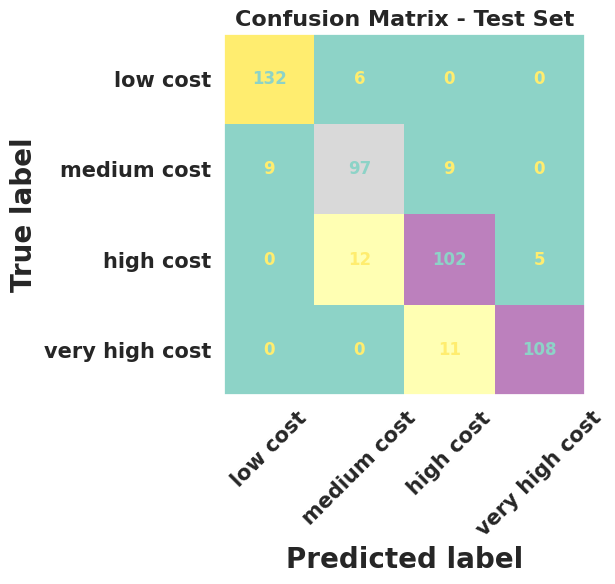

In [ ]:
# plotting confusion matrix for test set.
# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Create a display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(
    cmap='Set3',
    values_format='d',
    xticks_rotation=45,
    colorbar=False,
    ax=ax  # pass the axes to the plot
)

ax.set_title('Confusion Matrix - Test Set', fontsize=16)
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       138
         1.0       0.84      0.84      0.84       115
         2.0       0.84      0.86      0.85       119
         3.0       0.96      0.91      0.93       119

    accuracy                           0.89       491
   macro avg       0.89      0.89      0.89       491
weighted avg       0.89      0.89      0.89       491



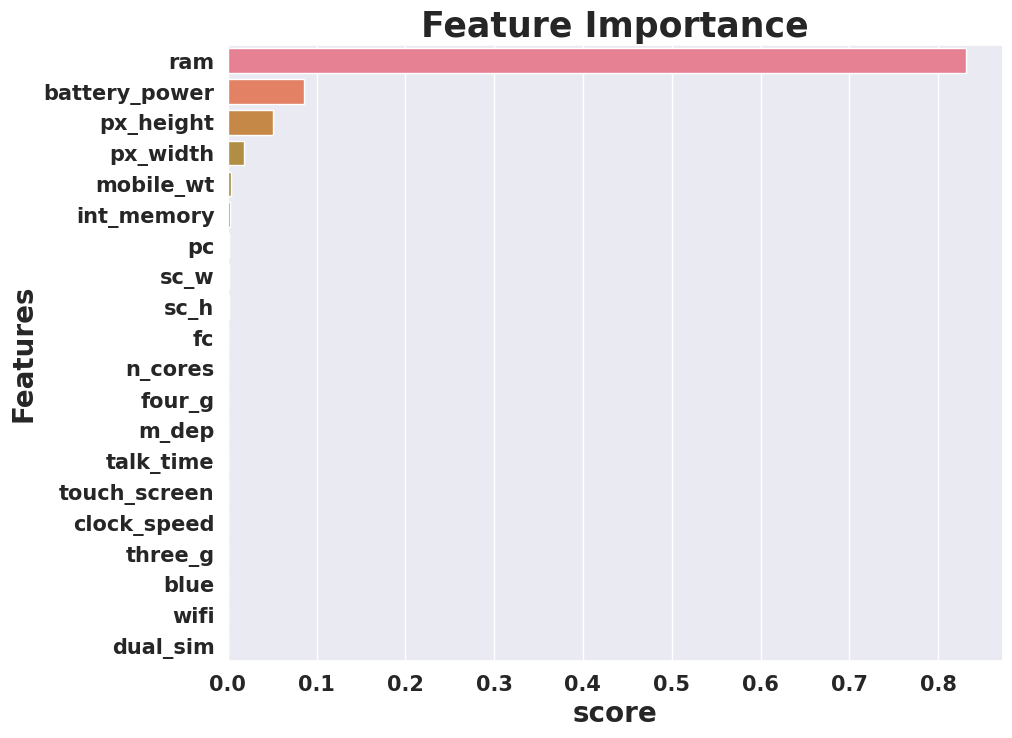

In [ ]:
#plotting feature importances
plot_feature_importance(gbc_optimal)

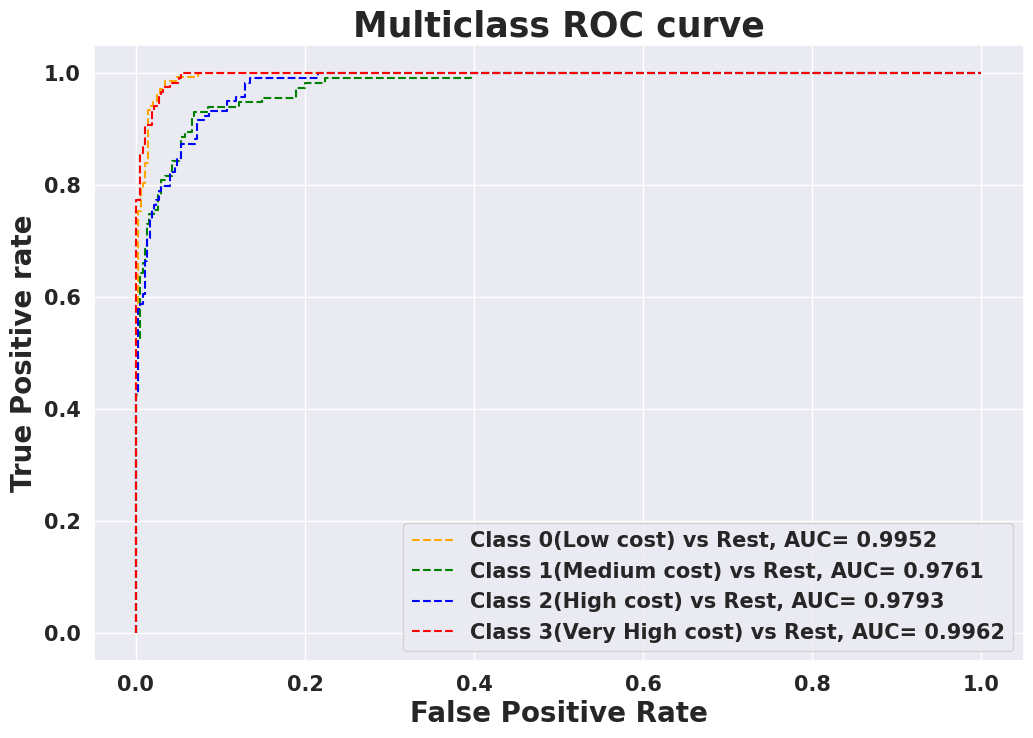

In [ ]:
# Plot AUC ROC curve.
pred_prob = gbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Observations of Gradient Boost Classifiers:**

***Before tunning:***
* ***Train accuracy score= 100%.***
* ***Test accuracy score= 89%***

***Model did not generalised well and overfitted the training data.*** ***so we tuned hyperparameters of model.***

***After Hyperparameter Tuning***
* ***Train accuracy score= 100%***
* ***Test accuarcy score=90%***

***Thus we slightly improved the model performance.However the model is not best.***





***From ROC curve it's clear that model was good to classify the class 0 and class 3.From the classification report its clear that recall for class 0 and class 3 is also good which is 96% and 90% respectively.***


# **4)K Nearest Neighbors**

### **With default hyperparametrs:**

In [ ]:
knn=KNeighborsClassifier()     # creating an object of the classifier
knn.fit(X_train_scaled,y_train)   #  fitting the data

KNeighborsClassifier()

In [ ]:
# predicting the y values of train and test set.
y_train_pred=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

In [ ]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

0.7029231815091774

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.5173116089613035

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[94, 39,  5,  0],
       [46, 51, 14,  4],
       [13, 45, 47, 14],
       [ 2, 17, 38, 62]])

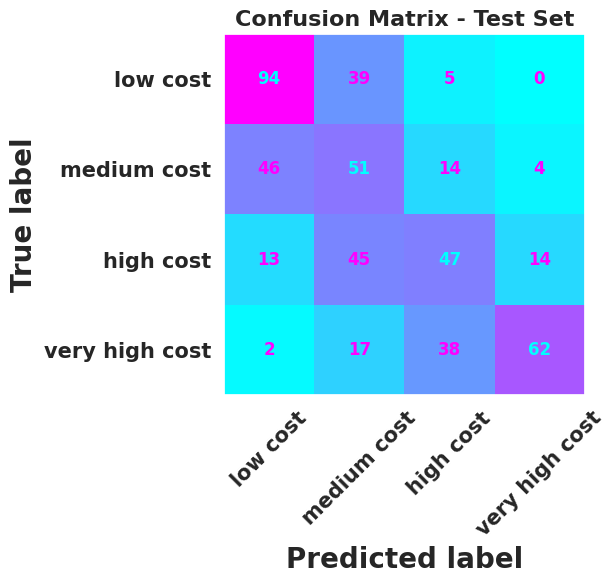

In [ ]:
# plotting confusion matrix for test set.
# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Create a display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(
    cmap='cool',
    values_format='d',
    xticks_rotation=45,
    colorbar=False,
    ax=ax  # pass the axes to the plot
)

ax.set_title('Confusion Matrix - Test Set', fontsize=16)
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# printing the classification report of test set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79       356
         1.0       0.61      0.63      0.62       376
         2.0       0.64      0.63      0.64       372
         3.0       0.89      0.68      0.77       367

    accuracy                           0.70      1471
   macro avg       0.71      0.70      0.70      1471
weighted avg       0.71      0.70      0.70      1471



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.68      0.64       138
         1.0       0.34      0.44      0.38       115
         2.0       0.45      0.39      0.42       119
         3.0       0.78      0.52      0.62       119

    accuracy                           0.52       491
   macro avg       0.54      0.51      0.52       491
weighted avg       0.55      0.52      0.52       491



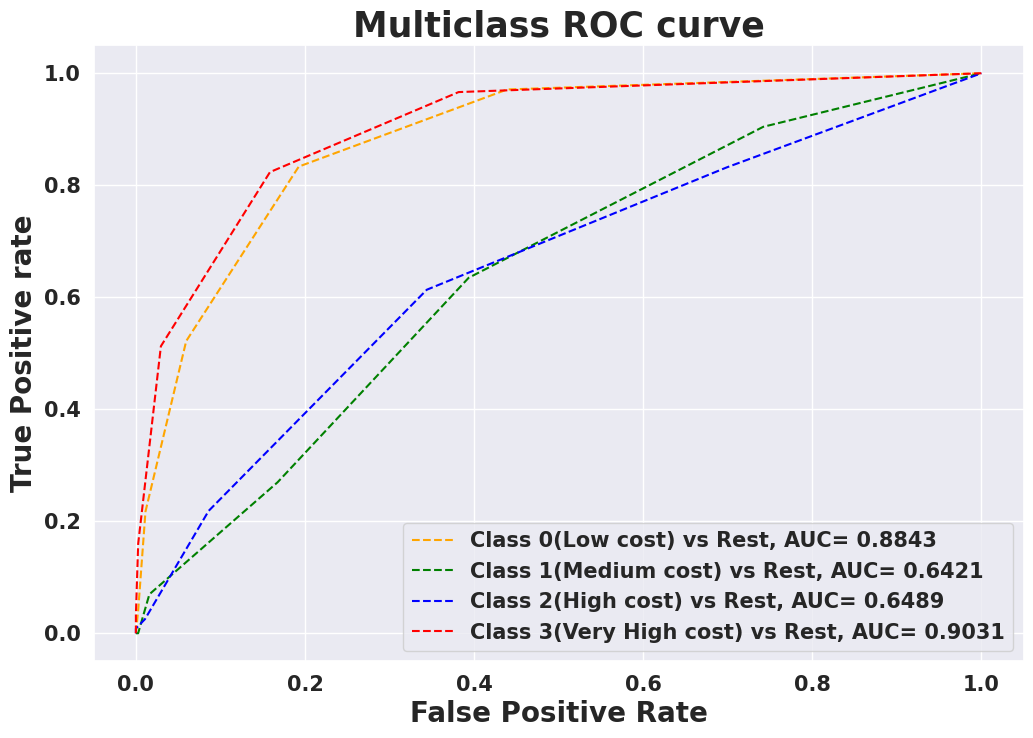

In [ ]:
# Plot AUC ROC curve.
pred_prob = knn.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

### **Let's do some HyperParameter tuning.**

In [ ]:
# creating an object of classifier
knn=KNeighborsClassifier()

In [ ]:
# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 31))}

In [ ]:
# applyong GridSearchCv with above grid values and cv=5
knn_tune=GridSearchCV(knn,cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.410 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.476 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.401 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.435 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.449 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.397 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.415 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.432 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.432 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.418 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.444 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=3)

In [ ]:
# getting thge best parameters
knn_tune.best_params_                     # thus  best n_neighnors came out to be 29

{'n_neighbors': 30}

In [ ]:
# fitting the data with best parameters
knn_optimal=KNeighborsClassifier(n_neighbors=29)
knn_optimal.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
# predicting y values of train and test set.
y_train_pred=knn_optimal.predict(X_train_scaled)
y_pred=knn_optimal.predict(X_test_scaled)

In [ ]:
#checking the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.6770904146838885

In [ ]:
# checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.5926680244399185

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[106,  29,   3,   0],
       [ 37,  56,  20,   2],
       [  3,  45,  54,  17],
       [  0,   7,  37,  75]])

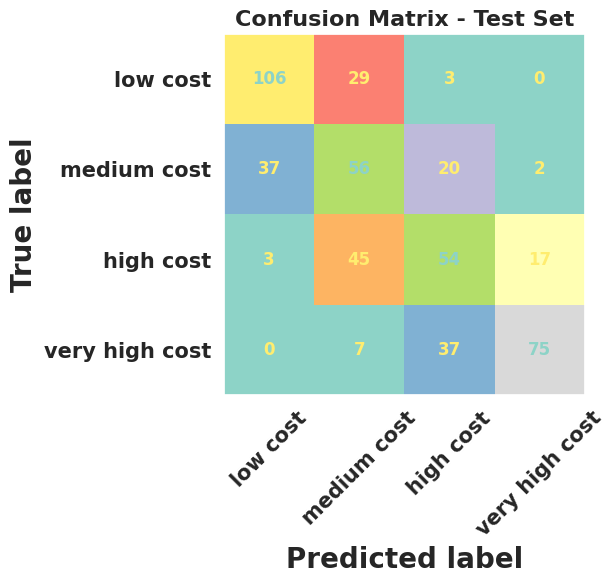

In [ ]:
# plotting confusion matrix for test set.
# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Create a display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(
    cmap='Set3',
    values_format='d',
    xticks_rotation=45,
    colorbar=False,
    ax=ax  # pass the axes to the plot
)

ax.set_title('Confusion Matrix - Test Set', fontsize=16)
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# printing tye classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       356
         1.0       0.59      0.56      0.57       376
         2.0       0.55      0.62      0.58       372
         3.0       0.83      0.68      0.74       367

    accuracy                           0.68      1471
   macro avg       0.69      0.68      0.68      1471
weighted avg       0.68      0.68      0.68      1471



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       138
         1.0       0.41      0.49      0.44       115
         2.0       0.47      0.45      0.46       119
         3.0       0.80      0.63      0.70       119

    accuracy                           0.59       491
   macro avg       0.60      0.58      0.59       491
weighted avg       0.61      0.59      0.60       491



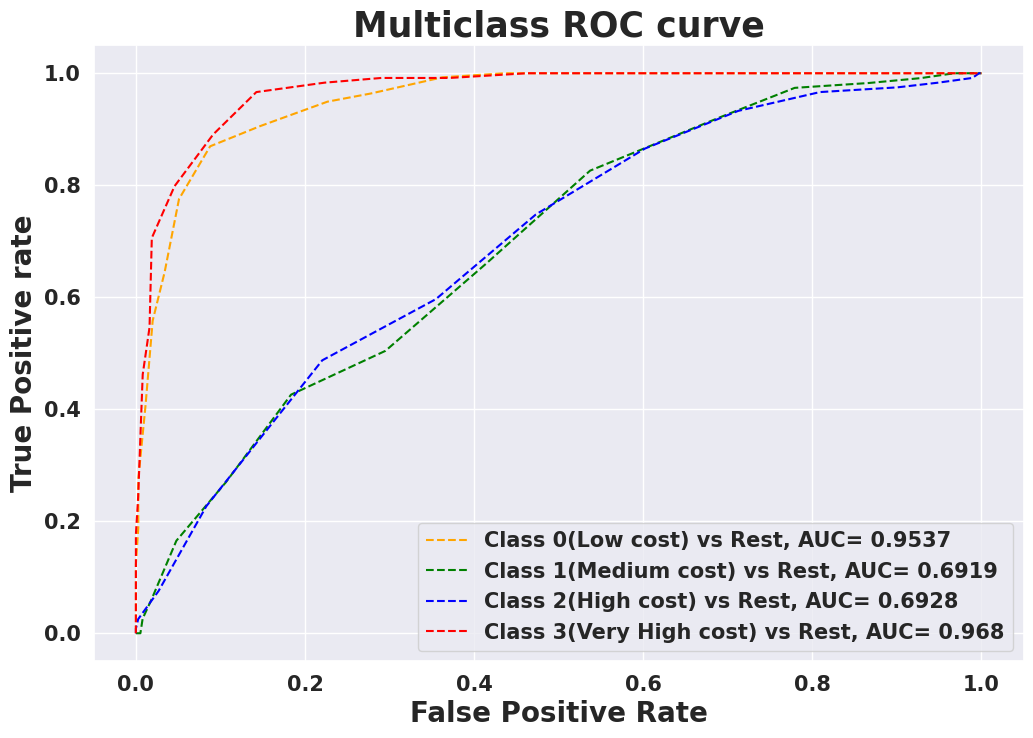

In [ ]:
# Plot AUC ROC curve.
pred_prob = knn_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

### **Observations:**
***Before hyperparameters tuning:***

* ***Train Accuracy:75 %***
* ***Test Accuarcy:59 %***

***Although the model initially showed suboptimal performance, we proceeded with hyperparameter tuning to enhance its results***

***After Hyperparameter Tuning:***

* ***Train Accuarcy: 77%***
* ***Test Accuarcy: 70%***

***Surely we improved the model perfromance and reduced overfitting but however this is not  good model for us.***



# **5) XGBoost Classifier:**

### **With default hyperparameter**

In [ ]:
# spltting the data into train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
xgb=XGBClassifier()        # creating an object of the classifier
xgb.fit(X_train,y_train)      # fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# predicting y values of train and test data.
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

In [ ]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.9022403258655805

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[128,  10,   0,   0],
       [  8, 100,   7,   0],
       [  0,  10, 103,   6],
       [  0,   0,   7, 112]])

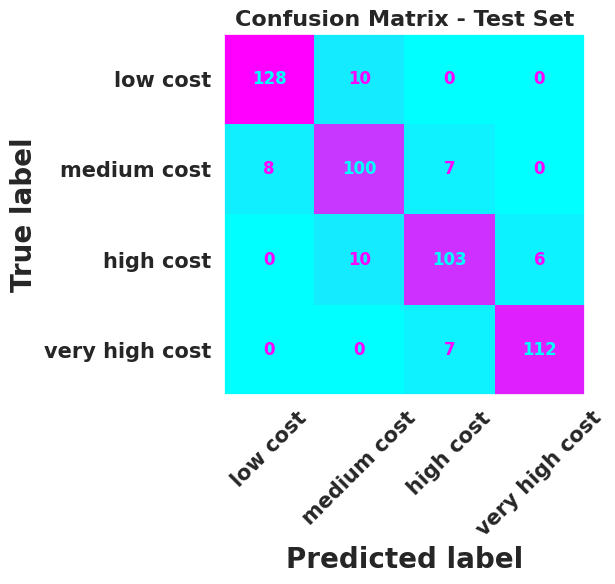

In [ ]:
# plotting confusion matrix for test set.
# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Create a display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(
    cmap='cool',
    values_format='d',
    xticks_rotation=45,
    colorbar=False,
    ax=ax  # pass the axes to the plot
)

ax.set_title('Confusion Matrix - Test Set', fontsize=16)
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# printing the classification report of train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
# printing the classification report of the test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       138
         1.0       0.83      0.87      0.85       115
         2.0       0.88      0.87      0.87       119
         3.0       0.95      0.94      0.95       119

    accuracy                           0.90       491
   macro avg       0.90      0.90      0.90       491
weighted avg       0.90      0.90      0.90       491



***Train accuracy = 98%***
***Test Accuarcy= 90 %***

### **Let's Do some Hyperparameter tuning:**

In [ ]:

# parameter grid values for GridSearchCv
grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }

In [ ]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv
xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)
xgb_tune.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.900 total time=   0.3s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.890 total time=   0.3s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.906 total time=   0.4s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.900 total time=   0.3s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.892 total time=   0.4s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.912 total time=   0.4s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.896 total time=   0.6s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.898 total time=   0.7s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [ ]:
xgb_tune.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 1000, 'subsample': 0.6}

In [ ]:
xgb_opti=XGBClassifier(learning_rate=.6,gamma=0.2,n_estimators=1000,subsample=0.5)
xgb_opti.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_train_pred=xgb_opti.predict(X_train)
y_pred=xgb_opti.predict(X_test)

In [ ]:
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
accuracy_score(y_test,y_pred)

0.9124236252545825

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[130,   8,   0,   0],
       [  6, 104,   5,   0],
       [  0,  10, 104,   5],
       [  0,   0,   9, 110]])

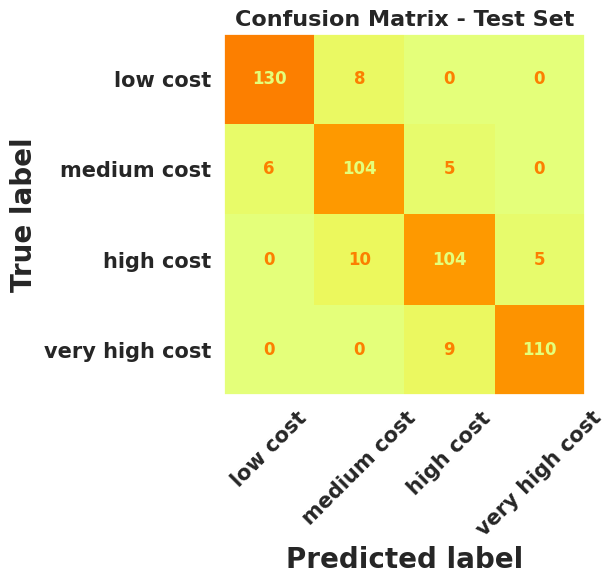

In [ ]:
# plotting confusion matrix for test set.
# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Create a display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(
    cmap='Wistia',
    values_format='d',
    xticks_rotation=45,
    colorbar=False,
    ax=ax  # pass the axes to the plot
)

ax.set_title('Confusion Matrix - Test Set', fontsize=16)
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
#printing the classifiaction report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       138
         1.0       0.85      0.90      0.88       115
         2.0       0.88      0.87      0.88       119
         3.0       0.96      0.92      0.94       119

    accuracy                           0.91       491
   macro avg       0.91      0.91      0.91       491
weighted avg       0.91      0.91      0.91       491



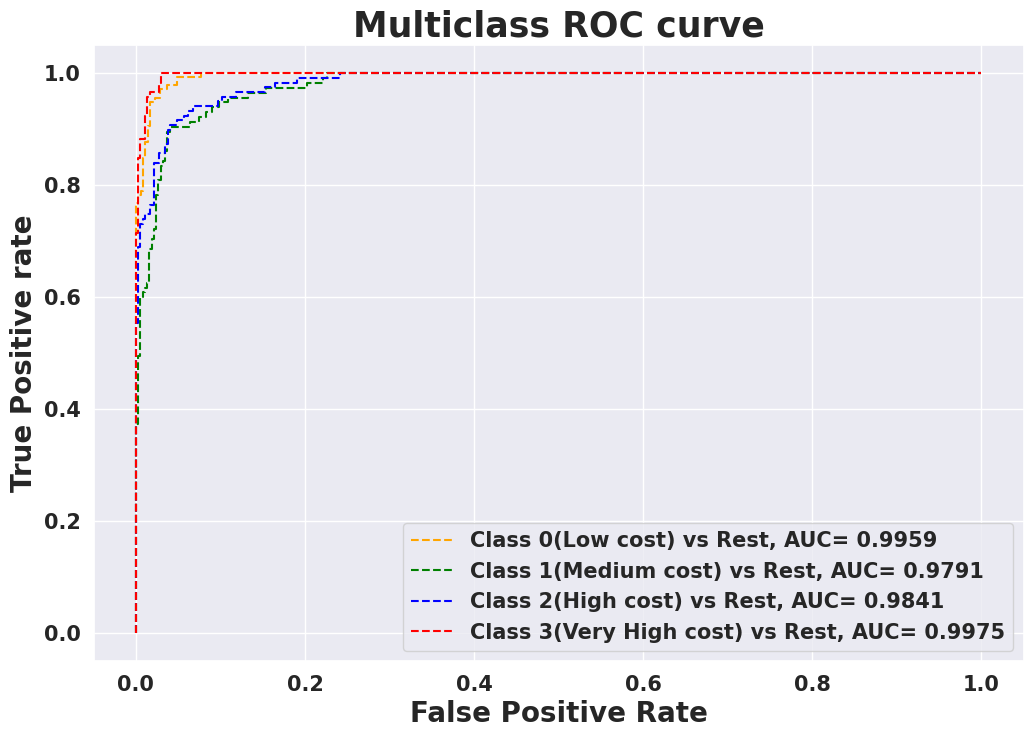

In [ ]:
# Plot AUC ROC curve.
pred_prob = xgb_opti.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

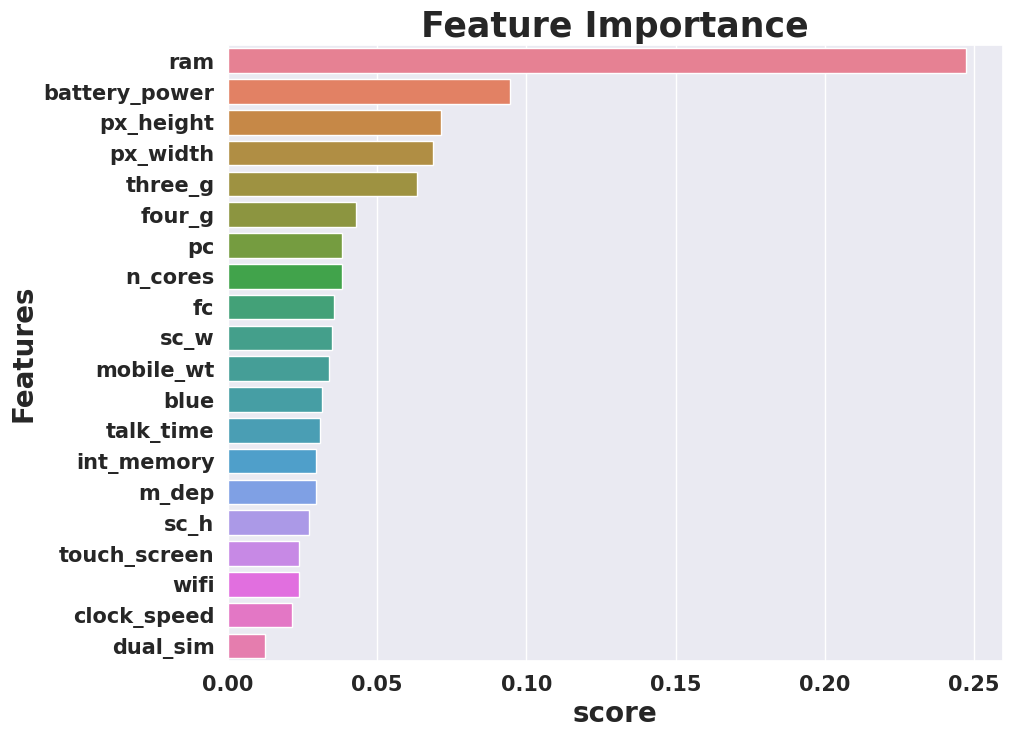

In [ ]:
#plotting feature importances
plot_feature_importance(xgb_opti)

### **Observations**

***Before hyperparameter Tuning***
* ***Train Accuarcy = 98%***
* ***Test Accuarcy = 90%***

***After hyperparameter Tuning***
* ***Train Accuarcy = 1%***
* ***Test Accuarcy = 92%***

***we have improved the model performance by Hyperparamter tuning. Test accuracy is increased to 92%.But still the difference of accuracy score between train and test is  more than 5%.We can say model is very slightly overfitted***

***From AUC-ROC curve its clear that model has almost correctly predicted the class 0 and class 3.***


#**6) SVM**

### **with default parameters.**

In [ ]:
# Import all relevant libraries

from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state=101)      # creating an object of classifier
svc.fit(X_train_scaled,y_train)    # fitting the model/training the model.

SVC(random_state=101)

In [ ]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train_scaled)
y_pred=svc.predict(X_test_scaled)


In [ ]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

0.9891230455472467

In [ ]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

0.8778004073319755

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[127,  11,   0,   0],
       [ 13,  95,   7,   0],
       [  0,  16,  97,   6],
       [  0,   0,   7, 112]])

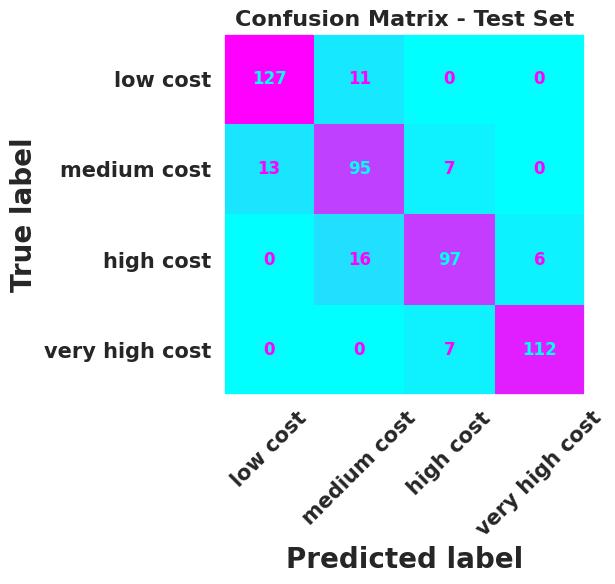

In [ ]:
# plotting confusion matrix for test set.
# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Create a display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(
    cmap='cool',
    values_format='d',
    xticks_rotation=45,
    colorbar=False,
    ax=ax  # pass the axes to the plot
)

ax.set_title('Confusion Matrix - Test Set', fontsize=16)
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       356
         1.0       0.98      0.99      0.99       376
         2.0       0.98      0.99      0.99       372
         3.0       0.99      0.99      0.99       367

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471



In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       138
         1.0       0.78      0.83      0.80       115
         2.0       0.87      0.82      0.84       119
         3.0       0.95      0.94      0.95       119

    accuracy                           0.88       491
   macro avg       0.88      0.88      0.88       491
weighted avg       0.88      0.88      0.88       491



### **Hyperparameter Tuning**

In [ ]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [ ]:
# creating an object for classifier
svm  = SVC ()

In [ ]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train_scaled,y_train)     # fitting the data into the model

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [ ]:
# getting the best parameters
svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [ ]:
# getting the best estimators
svm_cv.best_estimator_

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [ ]:
# applying best parameters to the SVm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)
svm_optimal.fit(X_train_scaled,y_train)   # fitting the data

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train_scaled)
y_pred=svm_optimal.predict(X_test_scaled)

In [ ]:
y_train_pred

array([0., 1., 2., ..., 1., 3., 2.])

In [ ]:
y_pred

array([1., 2., 2., 3., 2., 1., 0., 0., 2., 1., 3., 3., 2., 1., 0., 3., 3.,
       0., 2., 1., 0., 0., 1., 3., 1., 3., 0., 3., 2., 0., 2., 3., 3., 0.,
       0., 3., 1., 3., 0., 1., 0., 1., 2., 2., 0., 2., 2., 2., 1., 3., 2.,
       1., 3., 1., 1., 0., 0., 0., 3., 2., 3., 0., 3., 3., 1., 2., 3., 3.,
       1., 1., 0., 2., 2., 0., 2., 1., 0., 1., 2., 2., 0., 1., 3., 3., 3.,
       2., 0., 3., 3., 0., 3., 0., 1., 3., 3., 2., 1., 0., 2., 3., 2., 1.,
       0., 3., 1., 0., 2., 0., 1., 3., 0., 0., 2., 0., 2., 1., 2., 1., 1.,
       0., 0., 1., 1., 1., 1., 2., 3., 2., 2., 1., 3., 2., 0., 0., 0., 3.,
       2., 0., 0., 1., 1., 1., 1., 3., 0., 1., 0., 0., 2., 1., 1., 2., 0.,
       0., 1., 0., 2., 0., 1., 2., 3., 3., 2., 3., 2., 3., 2., 1., 3., 0.,
       2., 3., 1., 0., 3., 2., 3., 1., 2., 0., 2., 3., 3., 3., 1., 1., 0.,
       1., 2., 0., 1., 1., 0., 3., 2., 1., 1., 3., 3., 3., 2., 0., 3., 2.,
       1., 3., 0., 3., 2., 2., 2., 1., 0., 1., 0., 3., 3., 3., 0., 0., 0.,
       0., 0., 0., 1., 1.

In [ ]:
# checkig the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.9830047586675731

In [ ]:
# checking the accuracy of test data
accuracy_score(y_test,y_pred)

0.9674134419551935

In [ ]:
# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[138,   0,   0,   0],
       [  2, 107,   6,   0],
       [  0,   5, 112,   2],
       [  0,   0,   1, 118]])

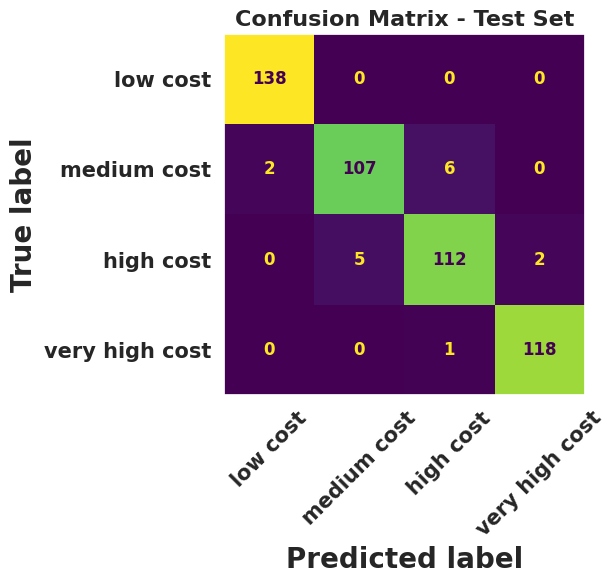

In [ ]:
# plotting confusion matrix for test set.
# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Create a display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(
    cmap='viridis',
    values_format='d',
    xticks_rotation=45,
    colorbar=False,
    ax=ax  # pass the axes to the plot
)

ax.set_title('Confusion Matrix - Test Set', fontsize=16)
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       356
         1.0       0.99      0.97      0.98       376
         2.0       0.96      0.99      0.97       372
         3.0       0.99      0.98      0.98       367

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       138
         1.0       0.96      0.93      0.94       115
         2.0       0.94      0.94      0.94       119
         3.0       0.98      0.99      0.99       119

    accuracy                           0.97       491
   macro avg       0.97      0.97      0.97       491
weighted avg       0.97      0.97      0.97       491



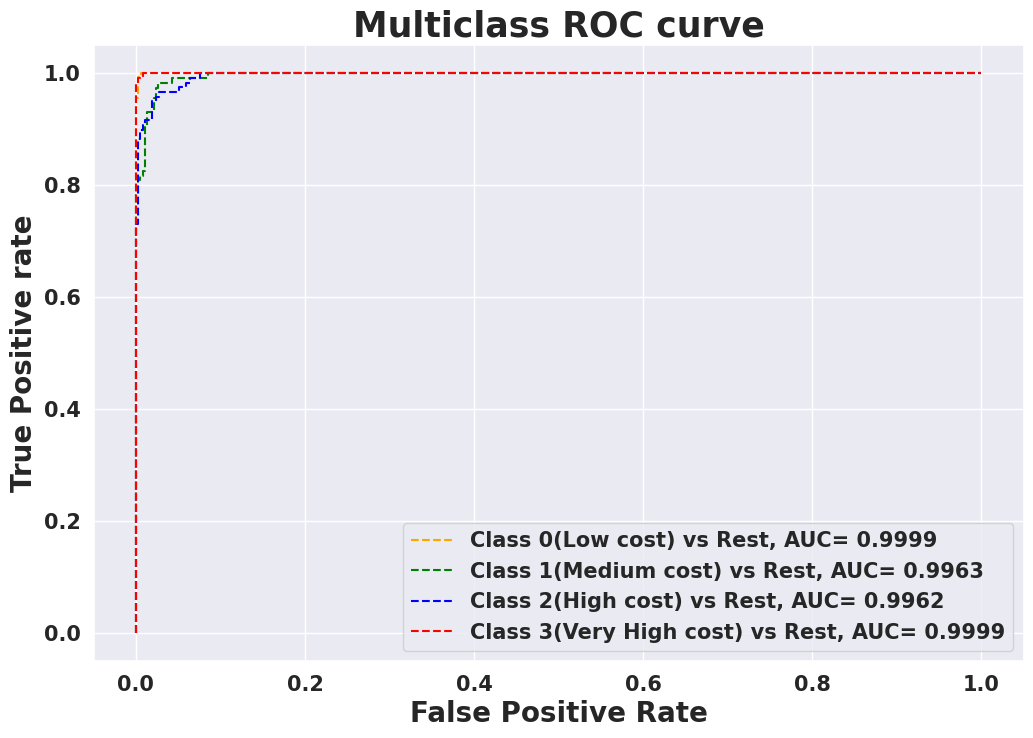

In [ ]:
# Plot AUC ROC curve.
pred_prob = svm_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

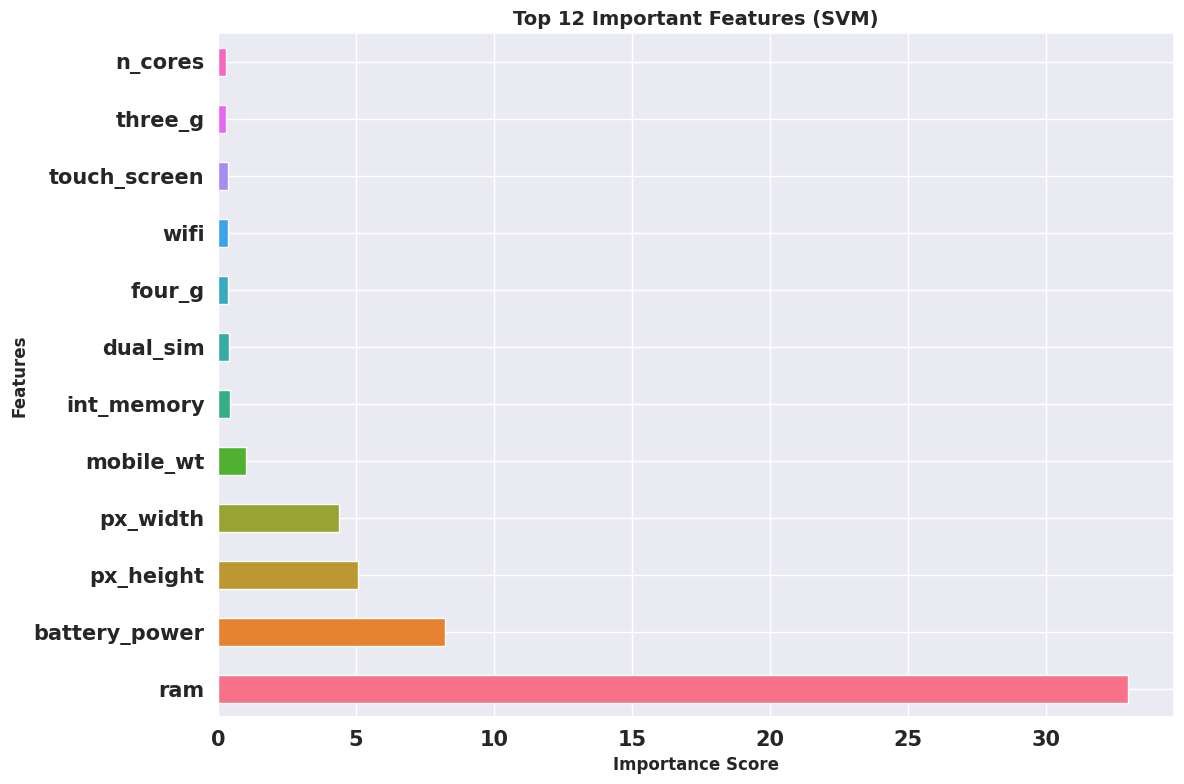

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(12, 8))

# Calculate the importance scores
svm_importance = abs(svm_optimal.coef_[0]) + abs(svm_optimal.coef_[1]) + abs(svm_optimal.coef_[2]) + abs(svm_optimal.coef_[3])
importance_series = pd.Series(svm_importance, index=X_train.columns).nlargest(12)

# Use a Seaborn or Matplotlib color palette
colors = sns.color_palette("husl", len(importance_series))

# Plot with colored bars
importance_series.plot(kind='barh', color=colors)

plt.title('Top 12 Important Features (SVM)', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


 **Observations**


* Accuracy score on train set is 98.5% and Test score is 89%.
* Model seems to be overfitted as the differance between train and test accuracy score is almot 10%.
* After Hyperparameter tuning train accuracy remained almost same  98.3% and test accuracy score increased to 97%.
* SVM performed very well as compared to other alogorithms.
* In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.
* f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 1.

#--------------------------------------------------------------------------------------------------------------------------------------------


# **Final Observations From Above Predictive Modeling**

### **Observations of Decision Tree Classifier:**
Before Hyperparameter Tuning:
* training accuarcy = 100%
* test accuarcy = 84%

Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.

After Hyperparameter tuning:
* Training accuarcy= 98%
* Test accuarcy = 91%

However this will not be good model for us. RAM,battery power,px_height and width came out to be the most important featrures. This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.96 for both classes,whereas for class 1 and class 2 it is 0.88.


### **Observations of Random Forest:**
Before Hyperparameter Tuning:
* training accuarcy = 100%
* test accuarcy = 88%

Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.

After Hyperparameter tuning:
* Training accuarcy= 100%
* Test accuarcy = 90%

we have slightly improved the model and overfitting is reduced slightly.
From roc curve its clear that model has poorly performed to classify class 1 and class 2


### **Observations of Gradient Boost Classifiers:**
Before Hyperparameter tunning:
* Train accuracy score= 100%.
* Test accuracy score= 89%

Model did not generalised well and overfitted the training data. so we tuned hyperparameters of model.

After Hyperparameter Tuning
* Train accuracy score= 100%
* Test accuarcy score=90%

Thus we slightly improved the model performance.However the model is not best.
From ROC curve it's clear that model was good to classify the class 0 and class 3.From the classification report its clear that recall for class 0 and class 3 is also good which is 96% and 90% respectively.

### **Observations of K Nearest Neighbors:**
Before hyperparameters tuning:
* Train Accuracy:75 %
* Test Accuarcy:59 %

Although the model initially showed suboptimal performance, we proceeded with hyperparameter tuning to enhance its results.

After Hyperparameter Tuning:
* Train Accuarcy: 77%
* Test Accuarcy: 70%

Surely we improved the model perfromance and reduced overfitting but however this is not good model for us.


### **Observations of XGBoost Classifier:**
Before Hyperparameter Tuning
* Train Accuarcy = 98%
* Test Accuarcy = 90%

After Hyperparameter Tuning
* Train Accuarcy = 100%
* Test Accuarcy = 92%

we have improved the model performance by Hyperparamter tuning. Test accuracy is increased to 92%.But still the difference of accuracy score between train and test is more than 5%.We can say model is very slightly overfitted
From AUC-ROC curve its clear that model has almost correctly predicted the class 0 and class 3.


###**Observations of SVM:**
Before Hyperparameter Tuning
* Train Accuarcy = 98.5%
* Test Accuarcy = 89%

After Hyperparameter Tuning
* Train Accuarcy = 98.3%
* Test Accuarcy = 97%

SVM performed very well as compared to other alogorithms.
In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.
f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 1.







#--------------------------------------------------------------------------------------------------------------------------------------------


Cross Checking whether the data is good for SVM or not by creating 4 dfs of each class. and plotting the scatterplot of most important feature "RAM" and  "Battery Power".

In [ ]:
df0=df[df['price_range']==0]    # creating df of class 0
df1=df[df['price_range']==1]    #creating df of class 1
df2=df[df['price_range']==2]    #creating df of class 2
df3=df[df['price_range']==3]     #creating df of class 3

<Axes: xlabel='ram', ylabel='battery_power'>

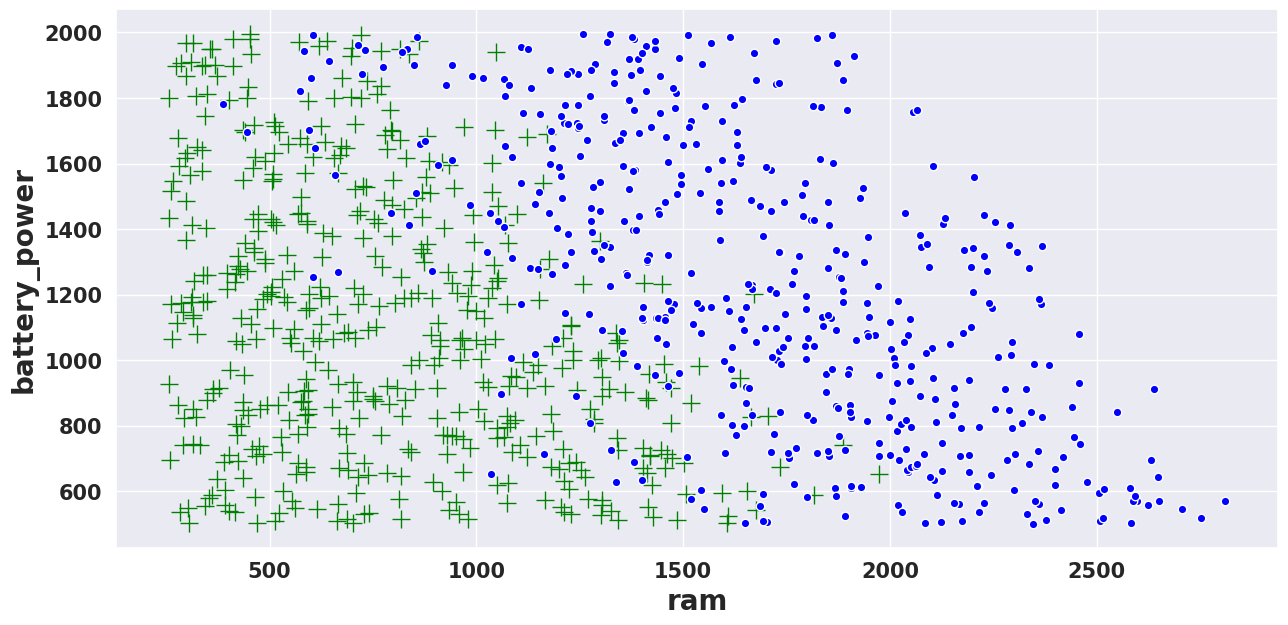

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df0['ram'],y=df0['battery_power'],color='green',marker='+',s=150)  #scatterplot of df0-class0
sns.scatterplot(x=df1['ram'],y=df1['battery_power'],color='blue',marker='.',s=150)   #scatterplot of df1-class1


In [ ]:
svm_optimal.n_support_

array([31, 58, 58, 33], dtype=int32)

<Axes: xlabel='ram', ylabel='battery_power'>

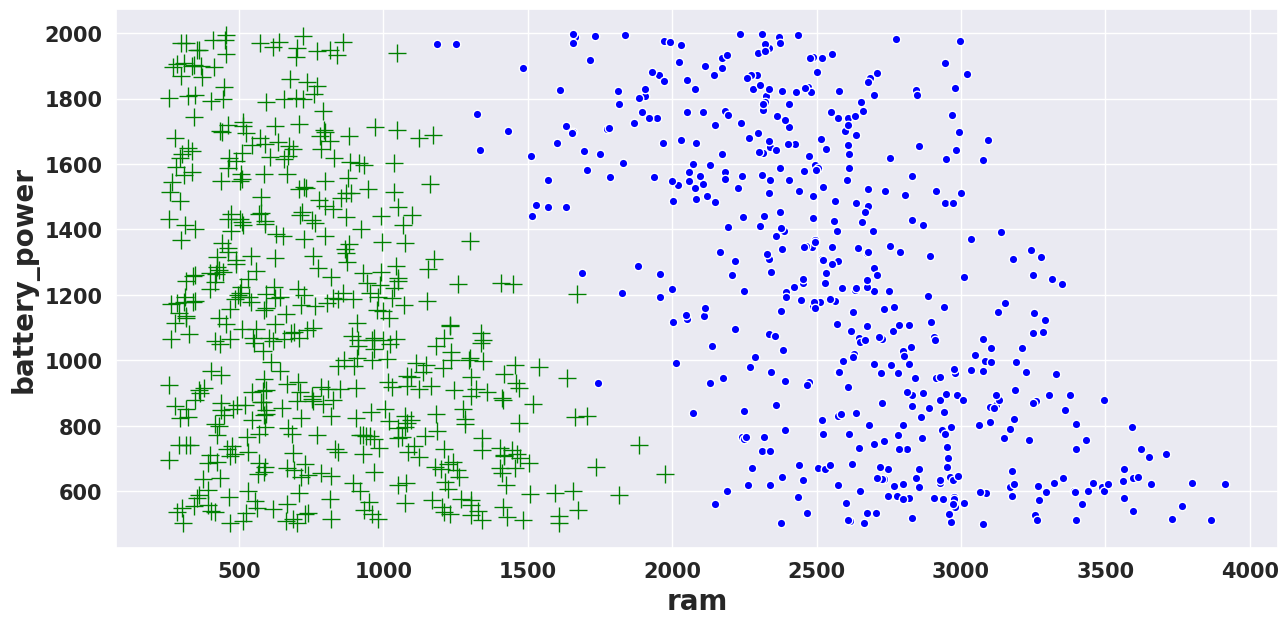

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df0['ram'],y=df0['battery_power'],color='green',marker='+',s=150)     #scatterplot of df0-class0
sns.scatterplot(x=df2['ram'],y=df2['battery_power'],color='blue',marker='.',s=150)      #scatterplot of df2-class2

<Axes: xlabel='ram', ylabel='battery_power'>

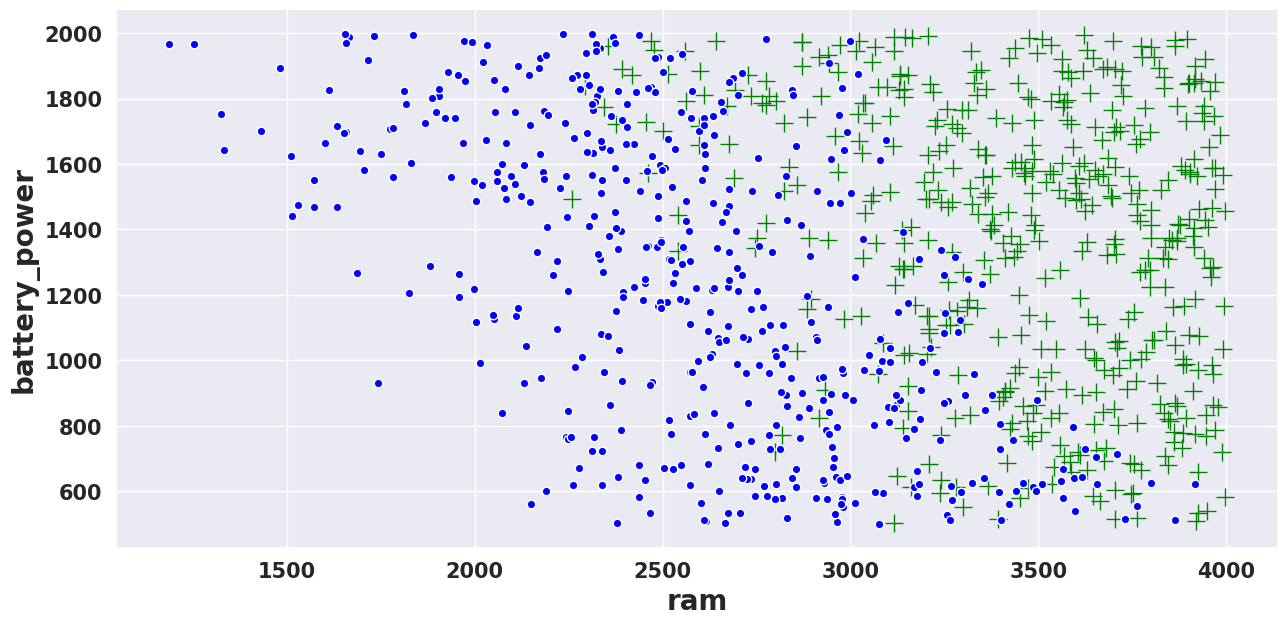

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df3['ram'],y=df3['battery_power'],color='green',marker='+',s=150)      #scatterplot of df3-class3
sns.scatterplot(x=df2['ram'],y=df2['battery_power'],color='blue',marker='.',s=150)       #scatterplot of df2-class2

<Axes: xlabel='ram', ylabel='battery_power'>

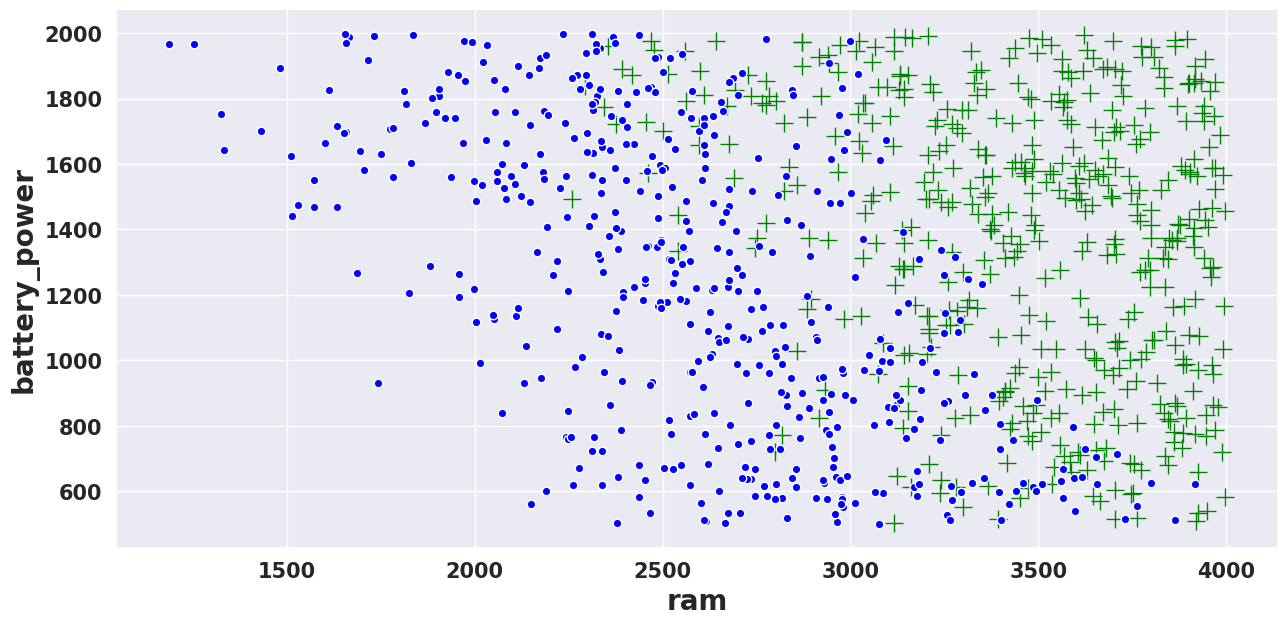

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df3['ram'],y=df3['battery_power'],color='green',marker='+',s=150)
sns.scatterplot(x=df2['ram'],y=df2['battery_power'],color='blue',marker='.',s=150)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# CSV file loaction path
file_path= '/content/drive/MyDrive/Unified Mentor Projects/Data files/Mobile pricing test.csv'

In [ ]:
# reading Test csv file.
test_df=pd.read_csv(file_path)

In [ ]:
test_df.drop('id',inplace=True,axis=1)

In [ ]:
test_df=test_df

In [ ]:
X_test

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
18           1131.0   1.0          0.5       1.0  11.0     0.0        49.0   
1115          501.0   1.0          0.5       1.0  14.0     0.0        22.0   
498          1926.0   1.0          1.7       1.0   1.0     1.0        33.0   
569          1366.0   1.0          0.7       1.0   0.0     1.0        34.0   
1295         1347.0   0.0          1.5       1.0  10.0     0.0        56.0   
...             ...   ...          ...       ...   ...     ...         ...   
174           534.0   0.0          0.5       1.0   0.0     1.0        16.0   
423          1681.0   1.0          2.5       0.0   2.0     0.0        11.0   
517          1059.0   0.0          2.4       0.0   8.0     0.0        61.0   
1045          531.0   0.0          1.1       0.0  10.0     0.0        63.0   
1401          950.0   0.0          0.5       0.0   6.0     1.0        55.0   

      m_dep  mobile_wt  n_cores    pc  px_height  px_width     ram  sc_h  \
18      0.6      101.0      5.0  18.0      658.0     878.0  1835.0  19.0   
1115    0.5      174.0      6.0  20.0      239.0    1636.0  3077.0  17.0   
498     0.4      172.0      3.0   2.0      982.0    1157.0  2488.0   6.0   
569     0.1      150.0      2.0   9.0      402.0     964.0  3501.0  13.0   
1295    0.3       95.0      1.0  19.0      398.0    1528.0  2456.0  13.0   
...     ...        ...      ...   ...        ...       ...     ...   ...   
174     1.0      189.0      5.0   1.0      393.0    1199.0  3926.0  16.0   
423     0.4      158.0      2.0  13.0      195.0    1205.0  1122.0  12.0   
517     0.1      134.0      3.0  18.0     1613.0    1916.0  3716.0  15.0   
1045    0.7      189.0      7.0  14.0      145.0    1903.0  2958.0  17.0   
1401    0.1      124.0      8.0   7.0       86.0    1681.0  1305.0   6.0   

      sc_w  talk_time  three_g  touch_screen  wifi  
18    13.0       16.0      1.0           1.0   0.0  
1115   3.0       17.0      0.0           0.0   0.0  
498    1.0       14.0      1.0           0.0   0.0  
569   11.0        3.0      1.0           0.0   0.0  
1295   5.0       13.0      1.0           1.0   1.0  
...    ...        ...      ...           ...   ...  
174   12.0       20.0      1.0           0.0   0.0  
423    6.0       16.0      0.0           1.0   1.0  
517   13.0       11.0      1.0           1.0   0.0  
1045   1.0       19.0      0.0           1.0   0.0  
1401   5.0        4.0      1.0           0.0   1.0  

[491 rows x 20 columns]

In [ ]:
test_df=test_df[X_test.columns.tolist()]

In [ ]:
test_df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  16        226      1412  3476    12     7   
1      0.8        191        5  12        746       857  3895     6     0   
2      0.9        186        3   4       1270      1366  2396    17    10   
3      0.5         96        8  20        295      1752  3893    10     0   
4      0.5        108        6  18        749       810  1773    15     8   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
995    0.5        170        7  17        644       913  2121    14     8   
996    0.9        186        4   2       1152      1632  1933     8     1   
997    0.5         80        1  12        477       825  1223     5     0   
998    0.4        171        2  12         38       832  2509    15    11   
999    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 20 columns]

In [ ]:
svm_optimal

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [ ]:
X_test_data=scaler.transform(test_df)         #scaling test df as model is trained on scaled data

In [ ]:
y_pred_test_data=svm_optimal.predict(X_test_data)

In [ ]:
y_pred_test_data

array([3., 3., 2., 3., 1., 3., 3., 1., 3., 0., 3., 3., 0., 0., 2., 0., 2.,
       1., 3., 2., 1., 3., 1., 1., 3., 0., 2., 0., 3., 0., 2., 0., 3., 0.,
       1., 1., 3., 1., 2., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       0., 2., 0., 3., 1., 3., 1., 1., 3., 3., 3., 0., 1., 1., 1., 2., 3.,
       1., 2., 1., 2., 2., 3., 3., 0., 2., 0., 1., 3., 0., 3., 3., 0., 3.,
       0., 3., 1., 3., 0., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 0.,
       0., 3., 0., 2., 0., 1., 2., 3., 3., 3., 1., 3., 3., 3., 3., 2., 3.,
       0., 0., 3., 2., 1., 2., 0., 3., 2., 3., 2., 0., 2., 2., 1., 3., 1.,
       1., 0., 3., 2., 1., 2., 1., 3., 2., 3., 3., 3., 2., 3., 2., 3., 1.,
       0., 3., 2., 3., 3., 3., 3., 2., 2., 3., 3., 3., 3., 1., 0., 3., 0.,
       0., 0., 2., 1., 0., 1., 0., 0., 1., 2., 1., 0., 0., 1., 1., 2., 2.,
       1., 0., 0., 0., 1., 0., 3., 1., 0., 2., 2., 2., 3., 1., 2., 2., 2.,
       3., 2., 2., 1., 1., 0., 1., 2., 0., 2., 2., 3., 0., 2., 0., 3., 2.,
       3., 3., 1., 0., 1.

In [ ]:
test_df['price_range']=y_pred_test_data

In [ ]:
test_df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  16        226      1412  3476    12     7   
1      0.8        191        5  12        746       857  3895     6     0   
2      0.9        186        3   4       1270      1366  2396    17    10   
3      0.5         96        8  20        295      1752  3893    10     0   
4      0.5        108        6  18        749       810  1773    15     8   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
995    0.5        170        7  17        644       913  2121    14     8   
996    0.9        186        4   2       1152      1632  1933     8     1   
997    0.5         80        1  12        477       825  1223     5     0   
998    0.4        171        2  12         38       832  2509    15    11   
999    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  price_range  
0            2        0             1     0          3.0  
1            7        1             0     0          3.0  
2           10        0             1     1          2.0  
3            7        1             1     0          3.0  
4            7        1             0     1          1.0  
..         ...      ...           ...   ...          ...  
995         15        1             1     0          2.0  
996         19        0             1     1          1.0  
997         14        1             0     0          0.0  
998          6        0             1     0          2.0  
999          3        1             0     1          2.0  

[1000 rows x 21 columns]

In [ ]:
df

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0             842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1            1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2             563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3             615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4            1821.0   1.0          1.2       0.0  13.0     1.0        44.0   
...             ...   ...          ...       ...   ...     ...         ...   
1993          794.0   1.0          0.5       1.0   0.0     1.0         2.0   
1994         1965.0   1.0          2.6       1.0   0.0     0.0        39.0   
1995         1911.0   0.0          0.9       1.0   1.0     1.0        36.0   
1996         1512.0   0.0          0.9       0.0   4.0     1.0        46.0   
1997          510.0   1.0          2.0       1.0   5.0     1.0        45.0   

      m_dep  mobile_wt  n_cores    pc  px_height  px_width     ram  sc_h  \
0       0.6      188.0      2.0   2.0       20.0     756.0  2549.0   9.0   
1       0.7      136.0      3.0   6.0      905.0    1988.0  2631.0  17.0   
2       0.9      145.0      5.0   6.0     1263.0    1716.0  2603.0  11.0   
3       0.8      131.0      6.0   9.0     1216.0    1786.0  2769.0  16.0   
4       0.6      141.0      2.0  14.0     1208.0    1212.0  1411.0   8.0   
...     ...        ...      ...   ...        ...       ...     ...   ...   
1993    0.8      106.0      6.0  14.0     1222.0    1890.0   668.0  13.0   
1994    0.2      187.0      4.0   3.0      915.0    1965.0  2032.0  11.0   
1995    0.7      108.0      8.0   3.0      868.0    1632.0  3057.0   9.0   
1996    0.1      145.0      5.0   5.0      336.0     670.0   869.0  18.0   
1997    0.9      168.0      6.0  16.0      483.0     754.0  3919.0  19.0   

      sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0      7.0       19.0      0.0           0.0   1.0          1.0  
1      3.0        7.0      1.0           1.0   0.0          2.0  
2      2.0        9.0      1.0           1.0   0.0          2.0  
3      8.0       11.0      1.0           0.0   0.0          2.0  
4      2.0       15.0      1.0           1.0   0.0          1.0  
...    ...        ...      ...           ...   ...          ...  
1993   4.0       19.0      1.0           1.0   0.0          0.0  
1994  10.0       16.0      1.0           1.0   1.0          2.0  
1995   1.0        5.0      1.0           1.0   0.0          3.0  
1996  10.0       19.0      1.0           1.0   1.0          0.0  
1997   4.0        2.0      1.0           1.0   1.0          3.0  

[1962 rows x 21 columns]

In [ ]:
df[df['ram']==3283]

battery_power  blue  clock_speed  dual_sim   fc  four_g  int_memory  \
21         1709.0   1.0          2.1       0.0  1.0     0.0        13.0   

    m_dep  mobile_wt  n_cores   pc  px_height  px_width     ram  sc_h  sc_w  \
21    1.0      156.0      2.0  2.0      974.0    1385.0  3283.0  17.0   1.0   

    talk_time  three_g  touch_screen  wifi  price_range  
21       15.0      1.0           0.0   0.0          3.0

In [ ]:
test_df[test_df['ram']==3893]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
3           1546     0          0.5         1  18       1          25    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
3         96        8  20        295      1752  3893    10     0          7   

   three_g  touch_screen  wifi  price_range  
3        1             1     0          3.0

# **Conclusion:**

* We Started with Data understanding, data wrangling, basic EDA where we found the relationship trends between price range and other independent variables.
* We selected the best features for predictive modeling by using K best feature selection method using
Chi square statistic.
* Implemented various classification algorithms, out of which the SM(Support vector machine) algorithm gave the best performance after hyper-parameter tuning with 98.3% train accuracy and 97 % test accuracy.
* XG boost is the second best good model which gave good performance after hyper-parameter tuning with 100% train accuracy and 92.25% test accuracy score.
* KNN showed comparatively lower performance than other models, indicating it's less suited for this particular dataset.
* We checked for the feature importance's of each model. RAM, Battery Power, Px_height and px_width contributed the most while predicting the price range.




In [ ]:
import joblib

# Save the trained SVM model
joblib.dump(svm_optimal, 'svm_mobile_price_model.pkl')

# Save your scaler if you used one
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']